In [1]:
import matplotlib
import numpy as np
matplotlib.rcParams["image.interpolation"] = 'none'
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from glob import glob
from tqdm import tqdm
from csbdeep.utils import Path, normalize
from stardist import fill_label_holes, random_label_cmap

np.random.seed(42)
lbl_cmap = random_label_cmap()

In [2]:
X_paths = sorted(glob('F:/Cell Detection Visual Data/Data/BCCD Dataset with mask/train/patches_scaled_4/images/*.png'))
Y_paths = sorted(glob('F:/Cell Detection Visual Data/Data/BCCD Dataset with mask/train/patches_scaled_4/masks/*.png'))
assert all(Path(x).name==Path(y).name for x,y in zip(X_paths,Y_paths))

In [3]:

from DataVisualization.utils import plot_img_label
import cv2
X_paths = X_paths[0:20]
Y_paths = Y_paths[0:20]
X = list(map(lambda path: cv2.cvtColor(cv2.imread(path, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB), X_paths))
Y = list(map(lambda path: cv2.imread(path, cv2.IMREAD_GRAYSCALE), Y_paths))
n_channel = 1 if X[0].ndim == 2 else X[0].shape[-1]

axis_norm = (0,1) 

#X = [normalize(x,1,99.8,axis=axis_norm) for x in tqdm(X)]
Y = [fill_label_holes(y) for y in tqdm(Y)]



100%|██████████| 20/20 [00:00<00:00, 168.02it/s]


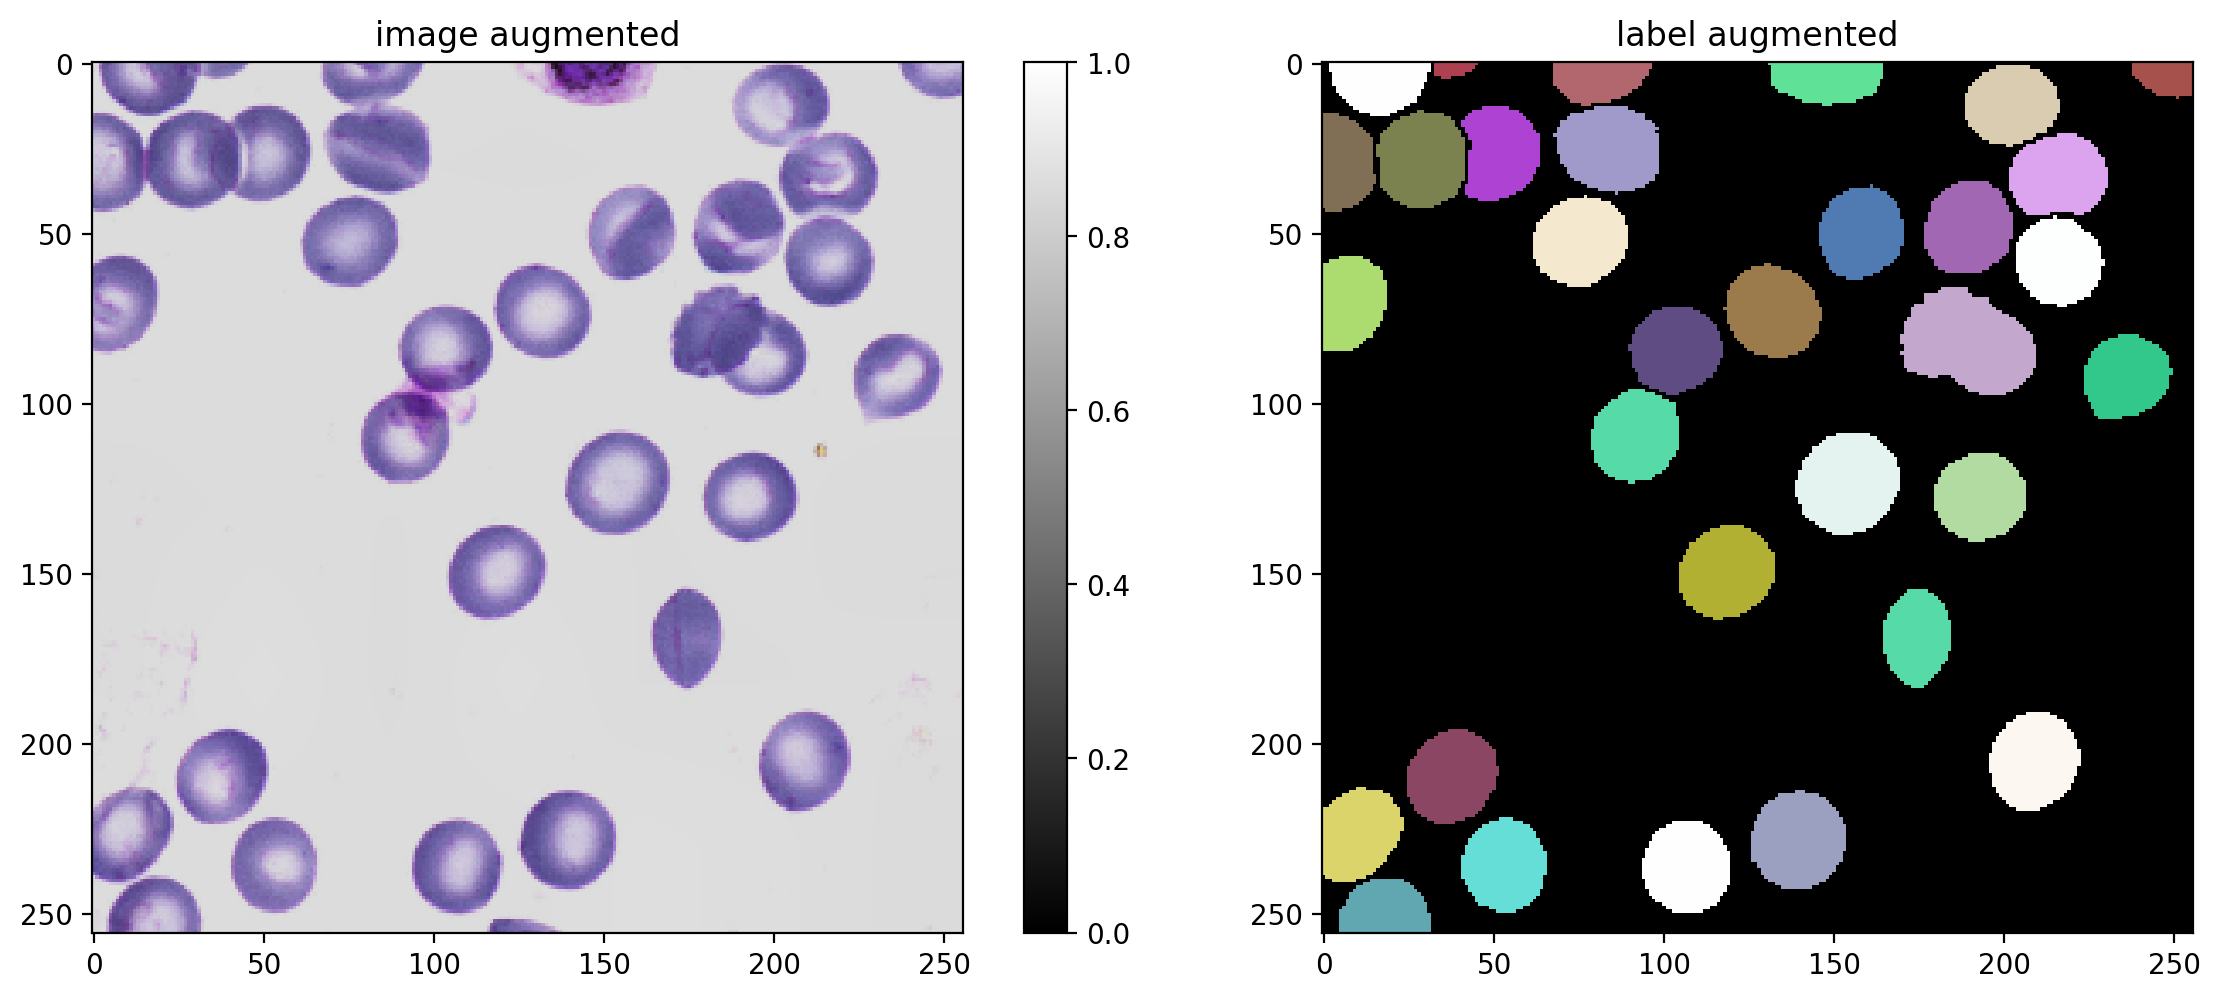

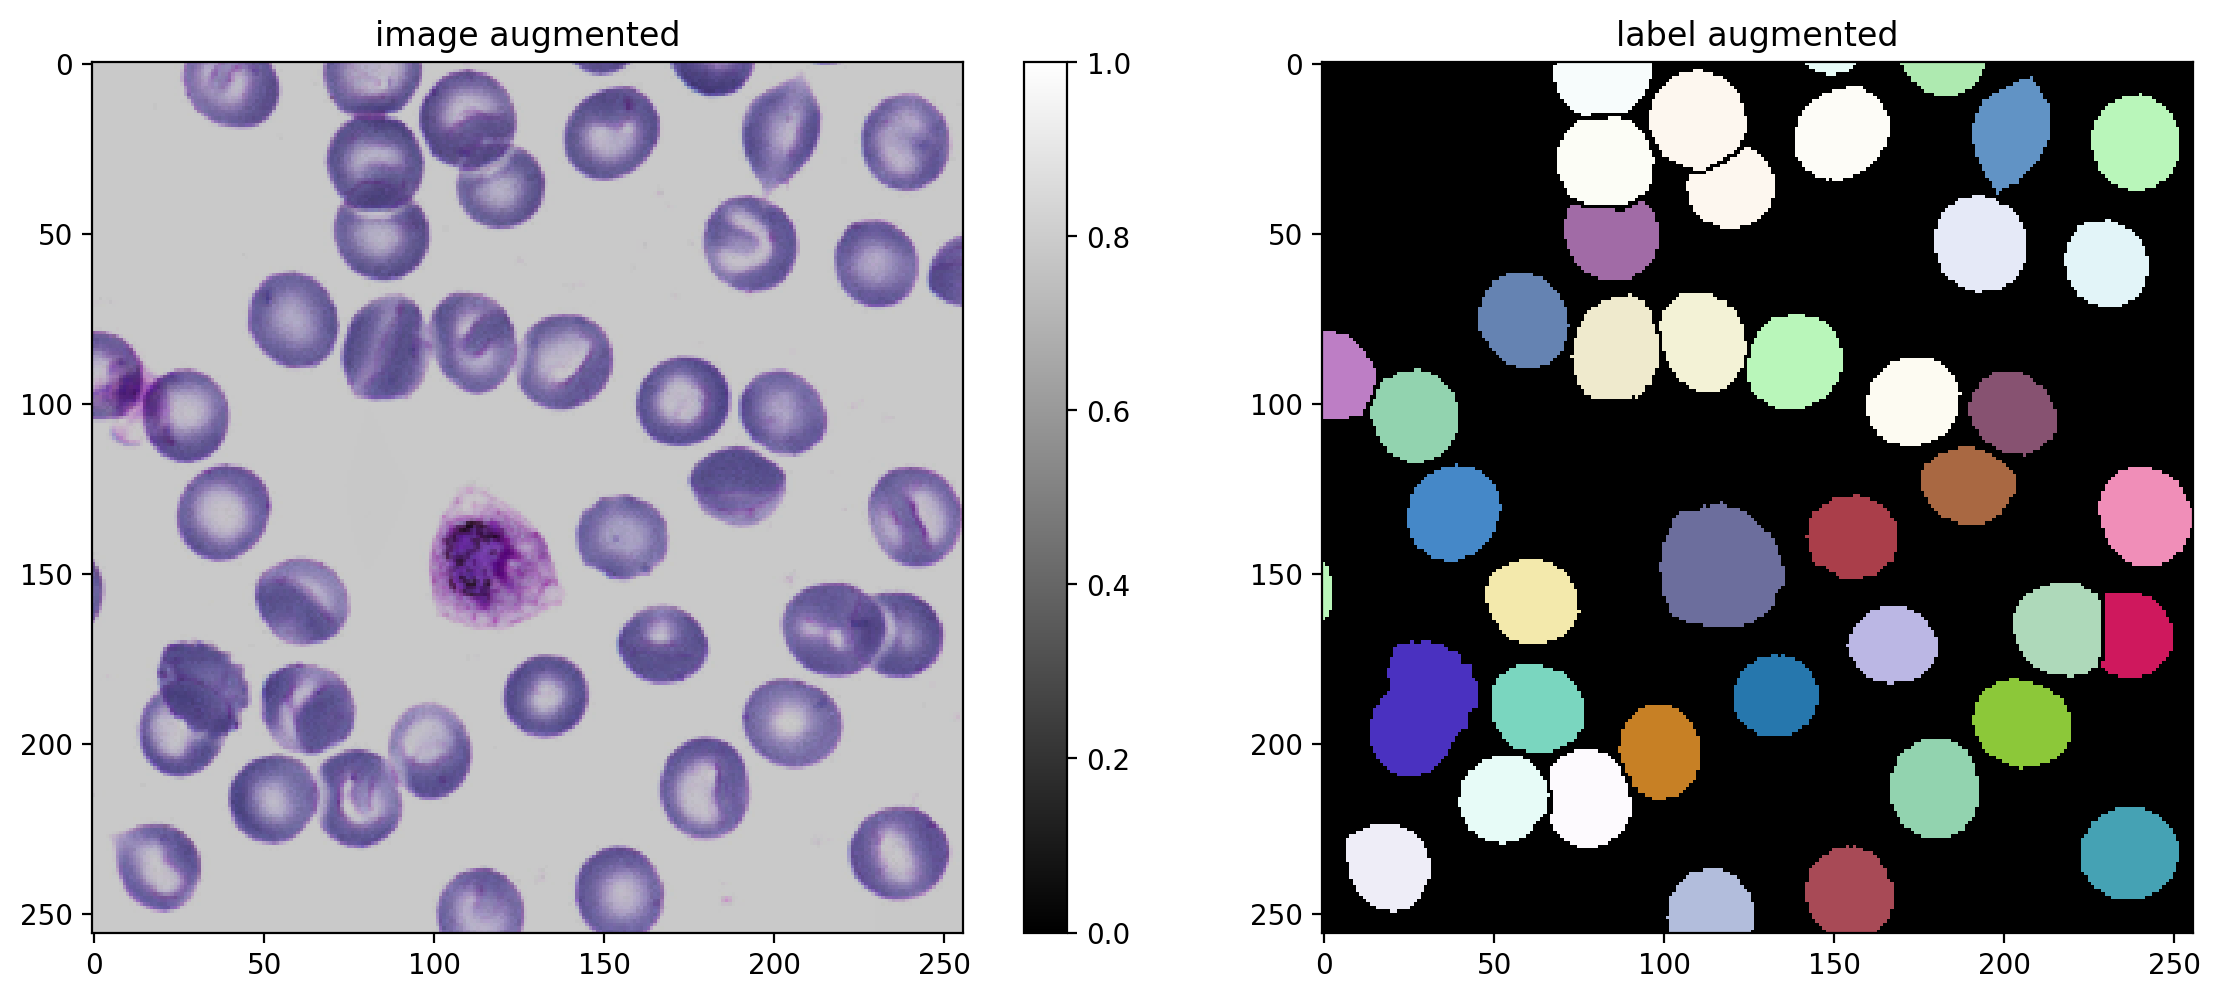

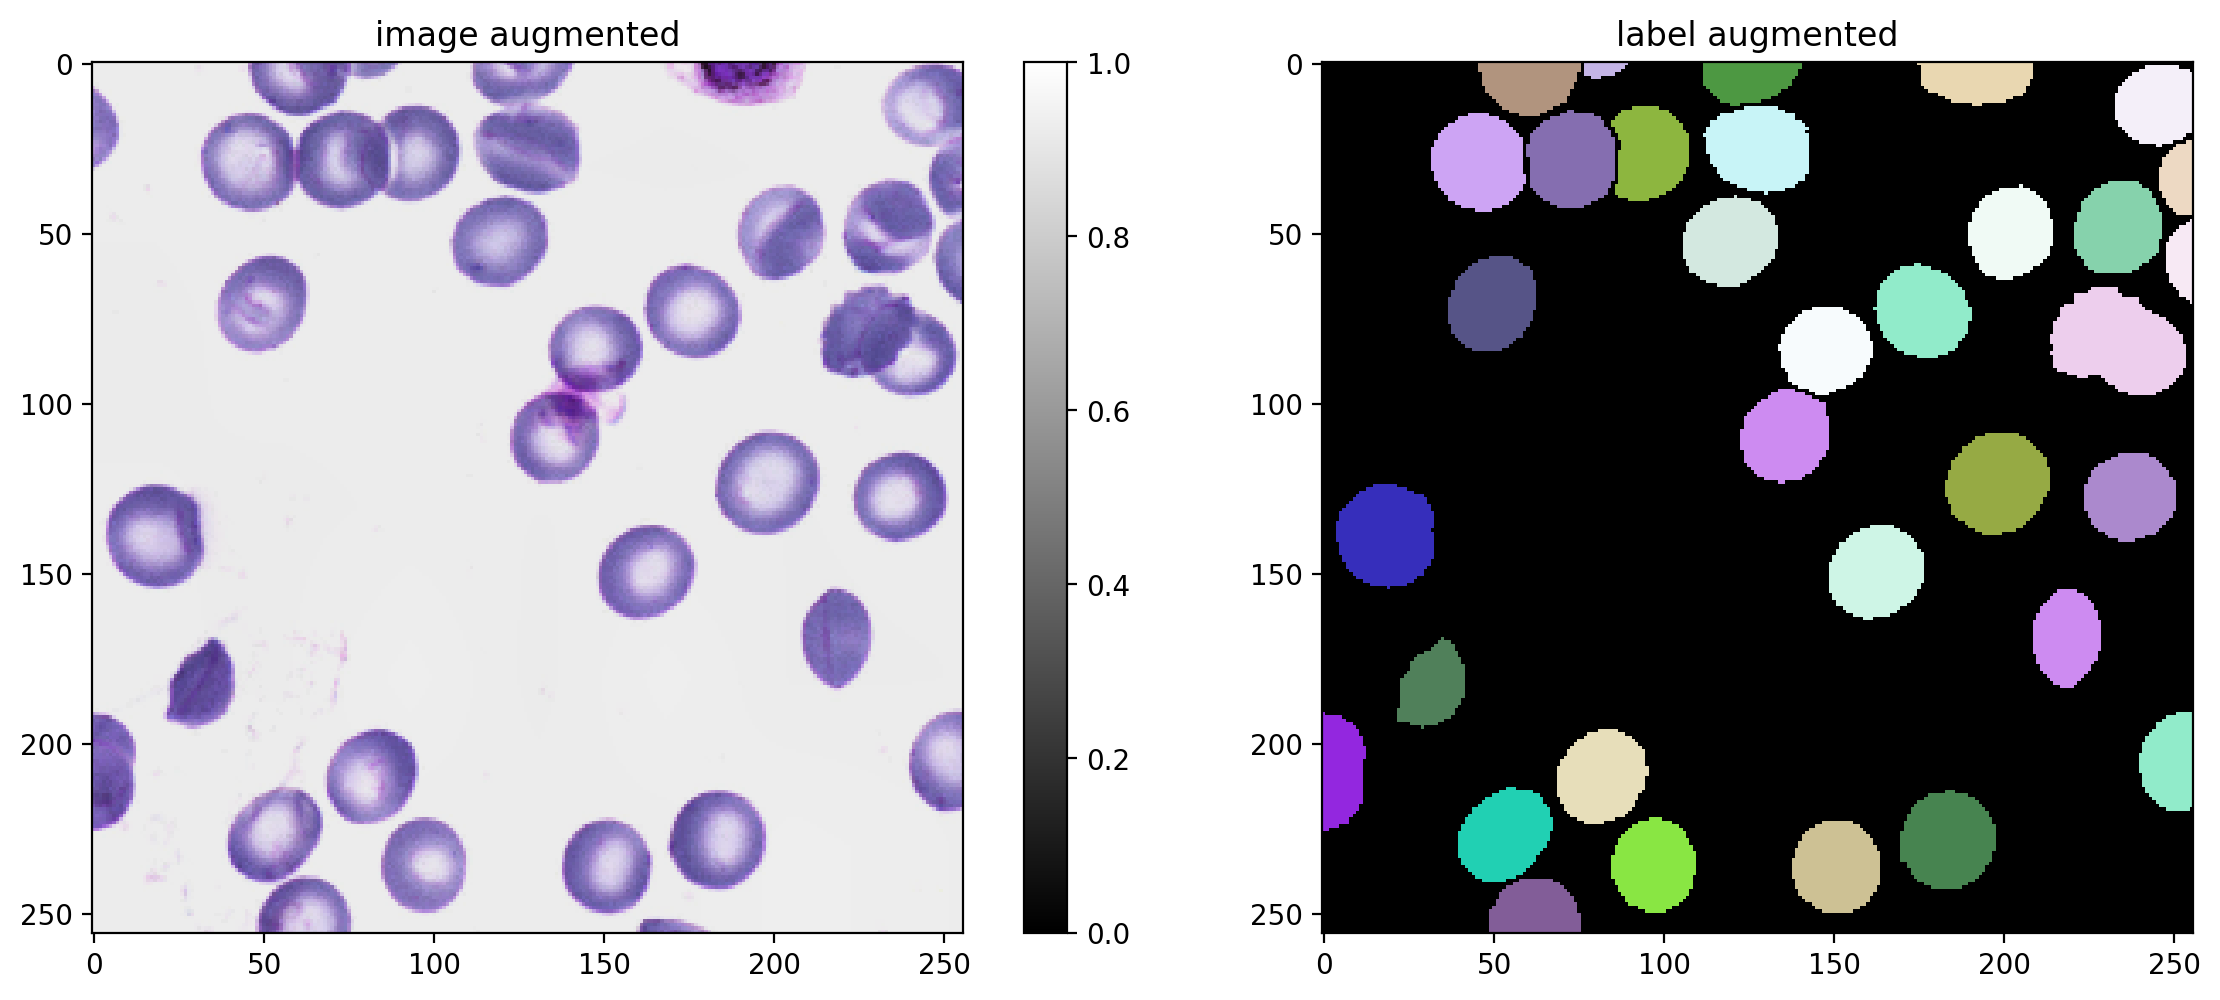

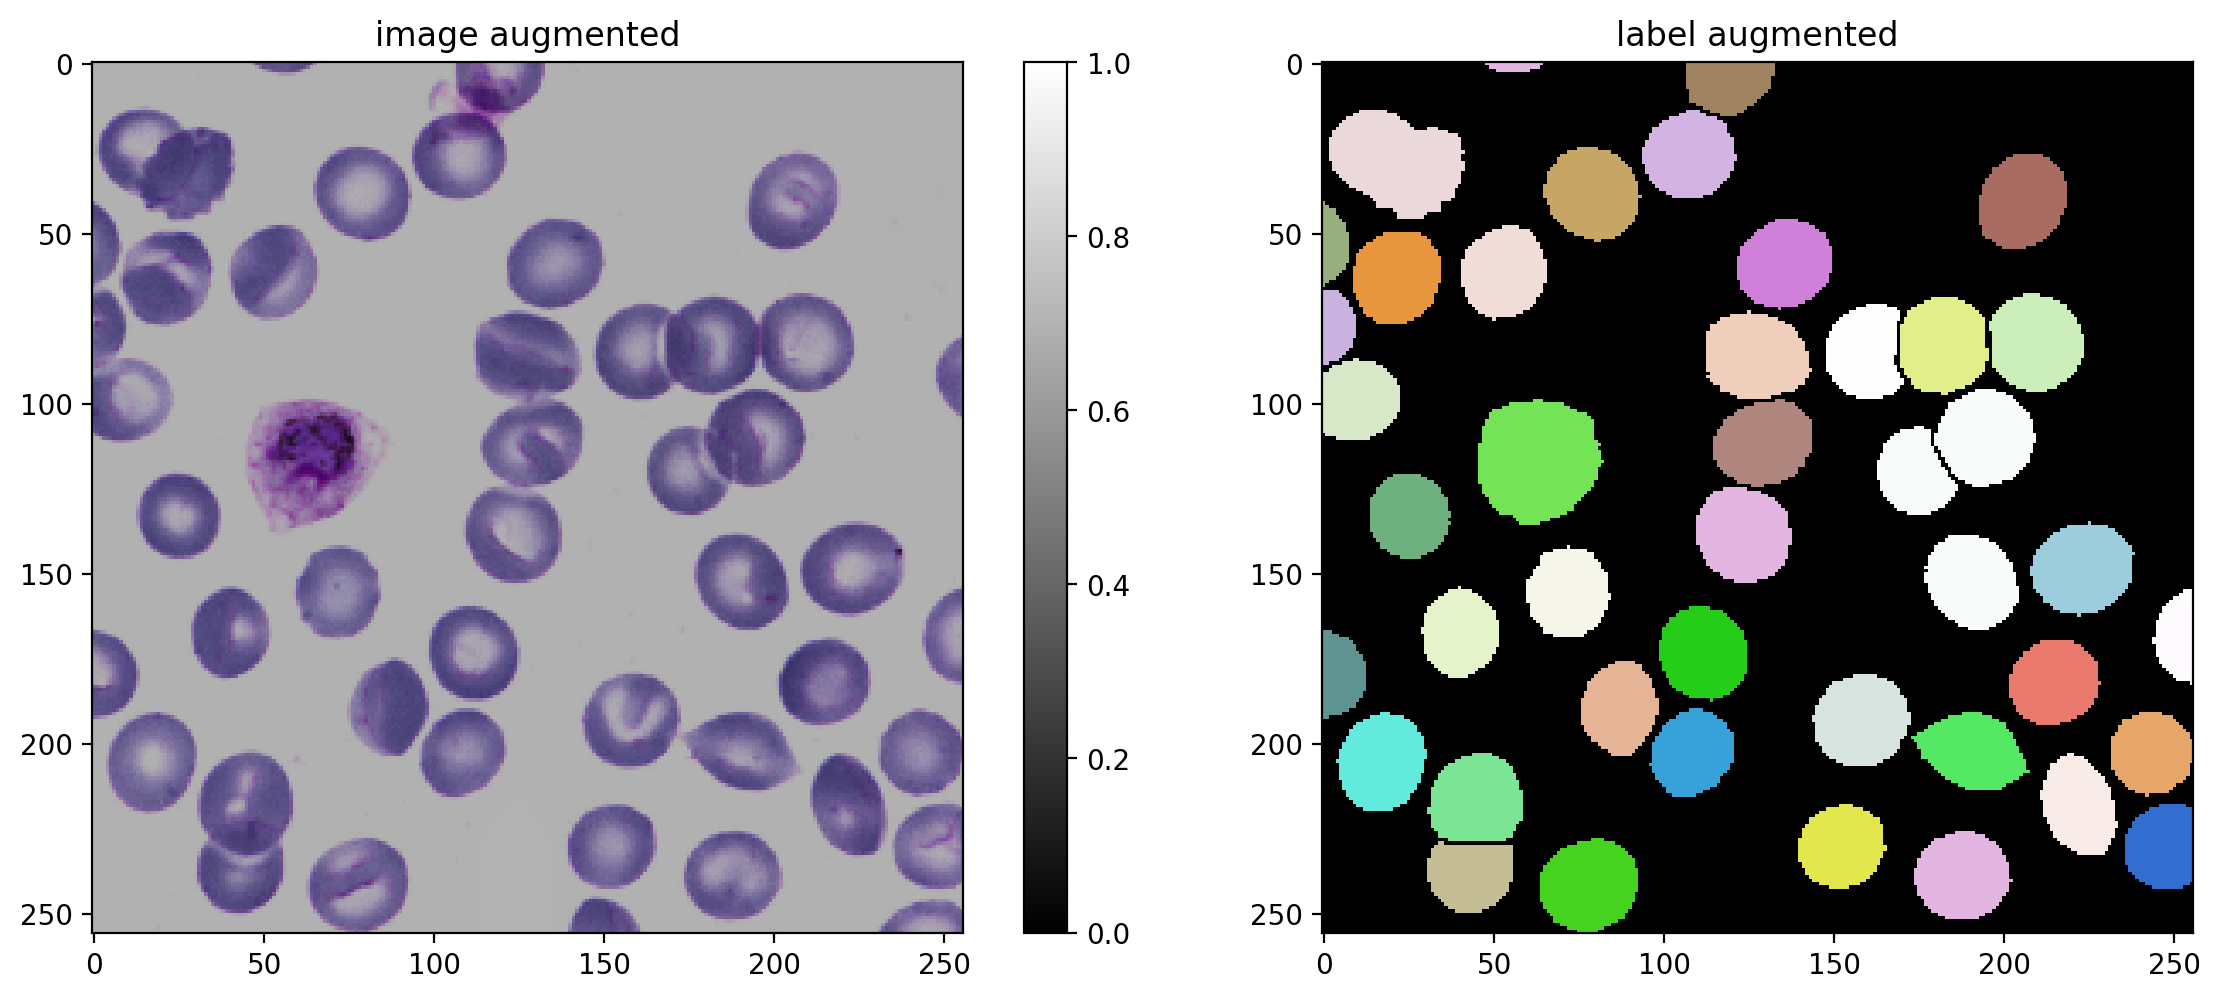

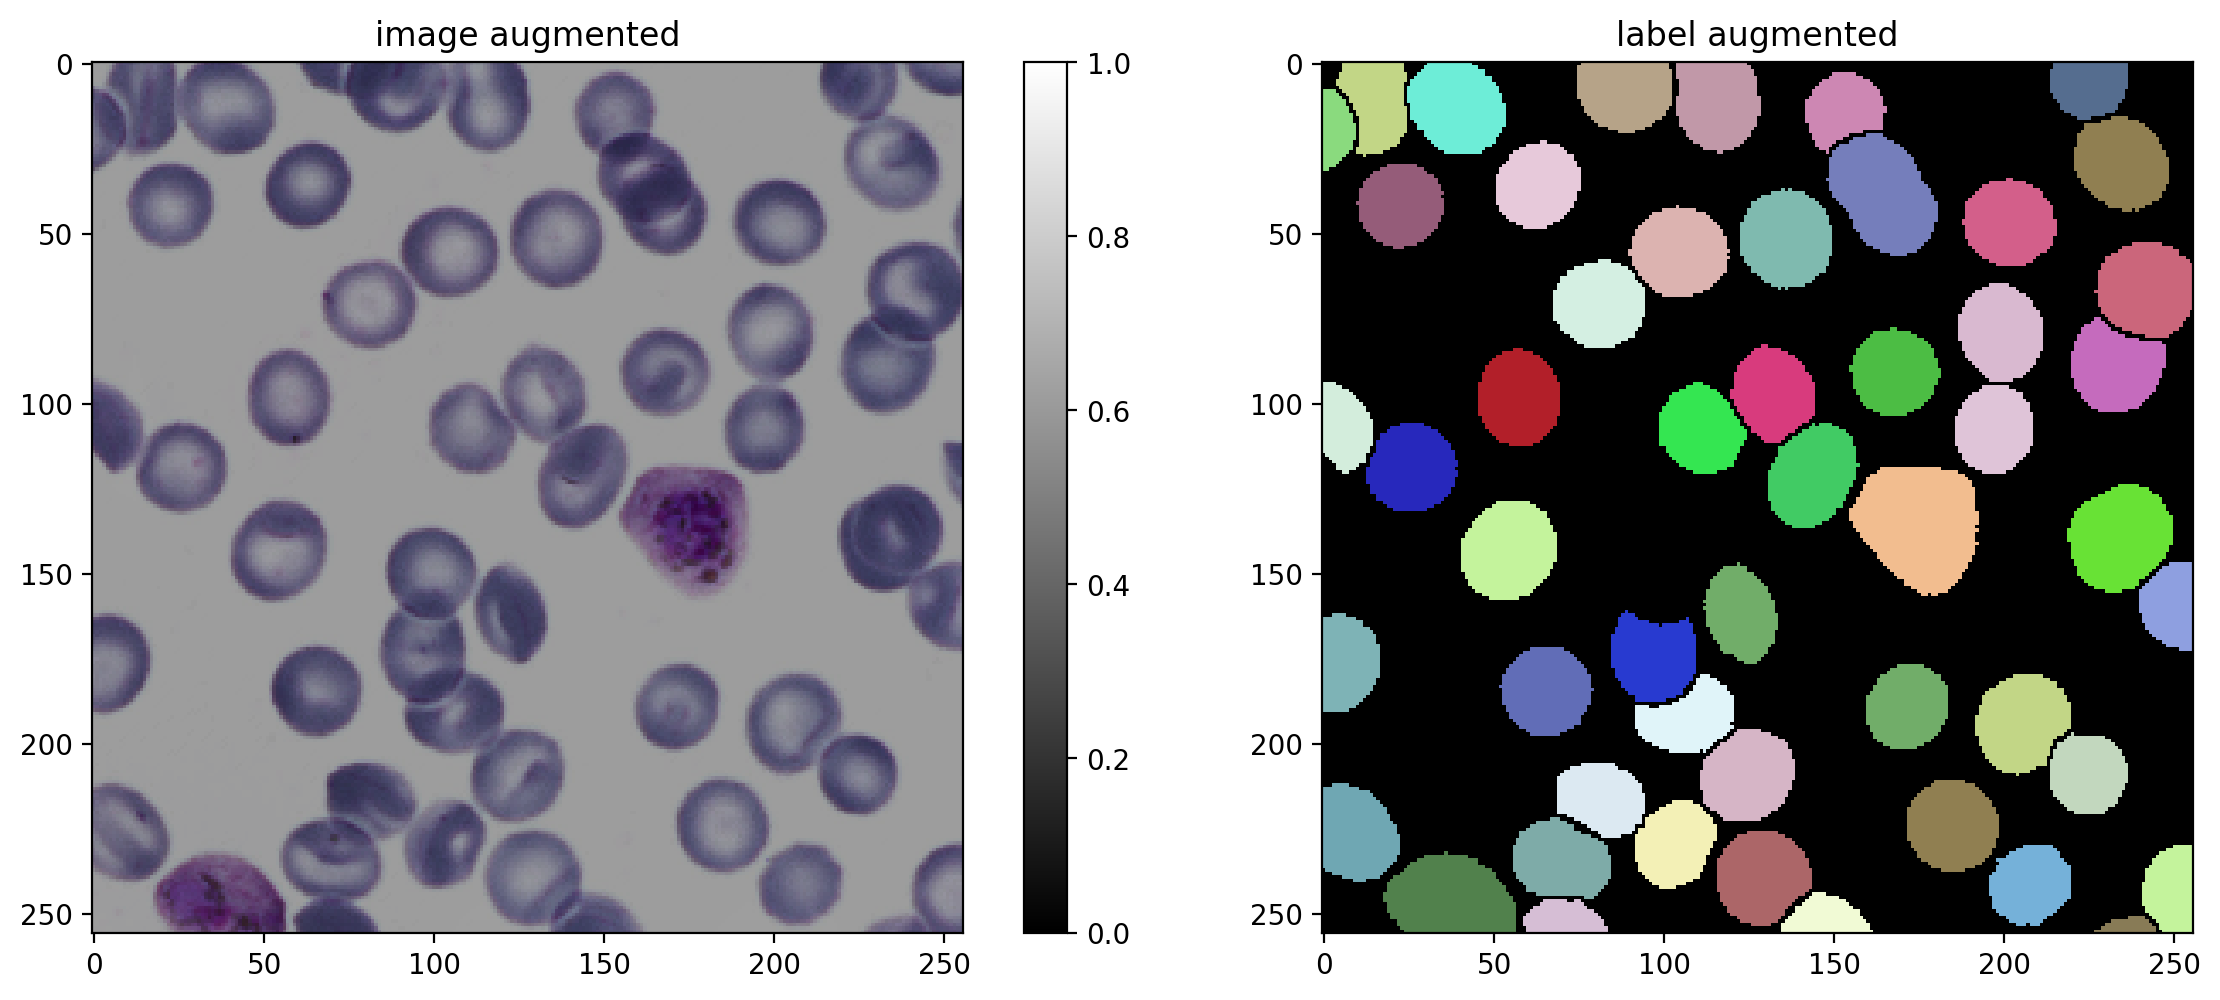

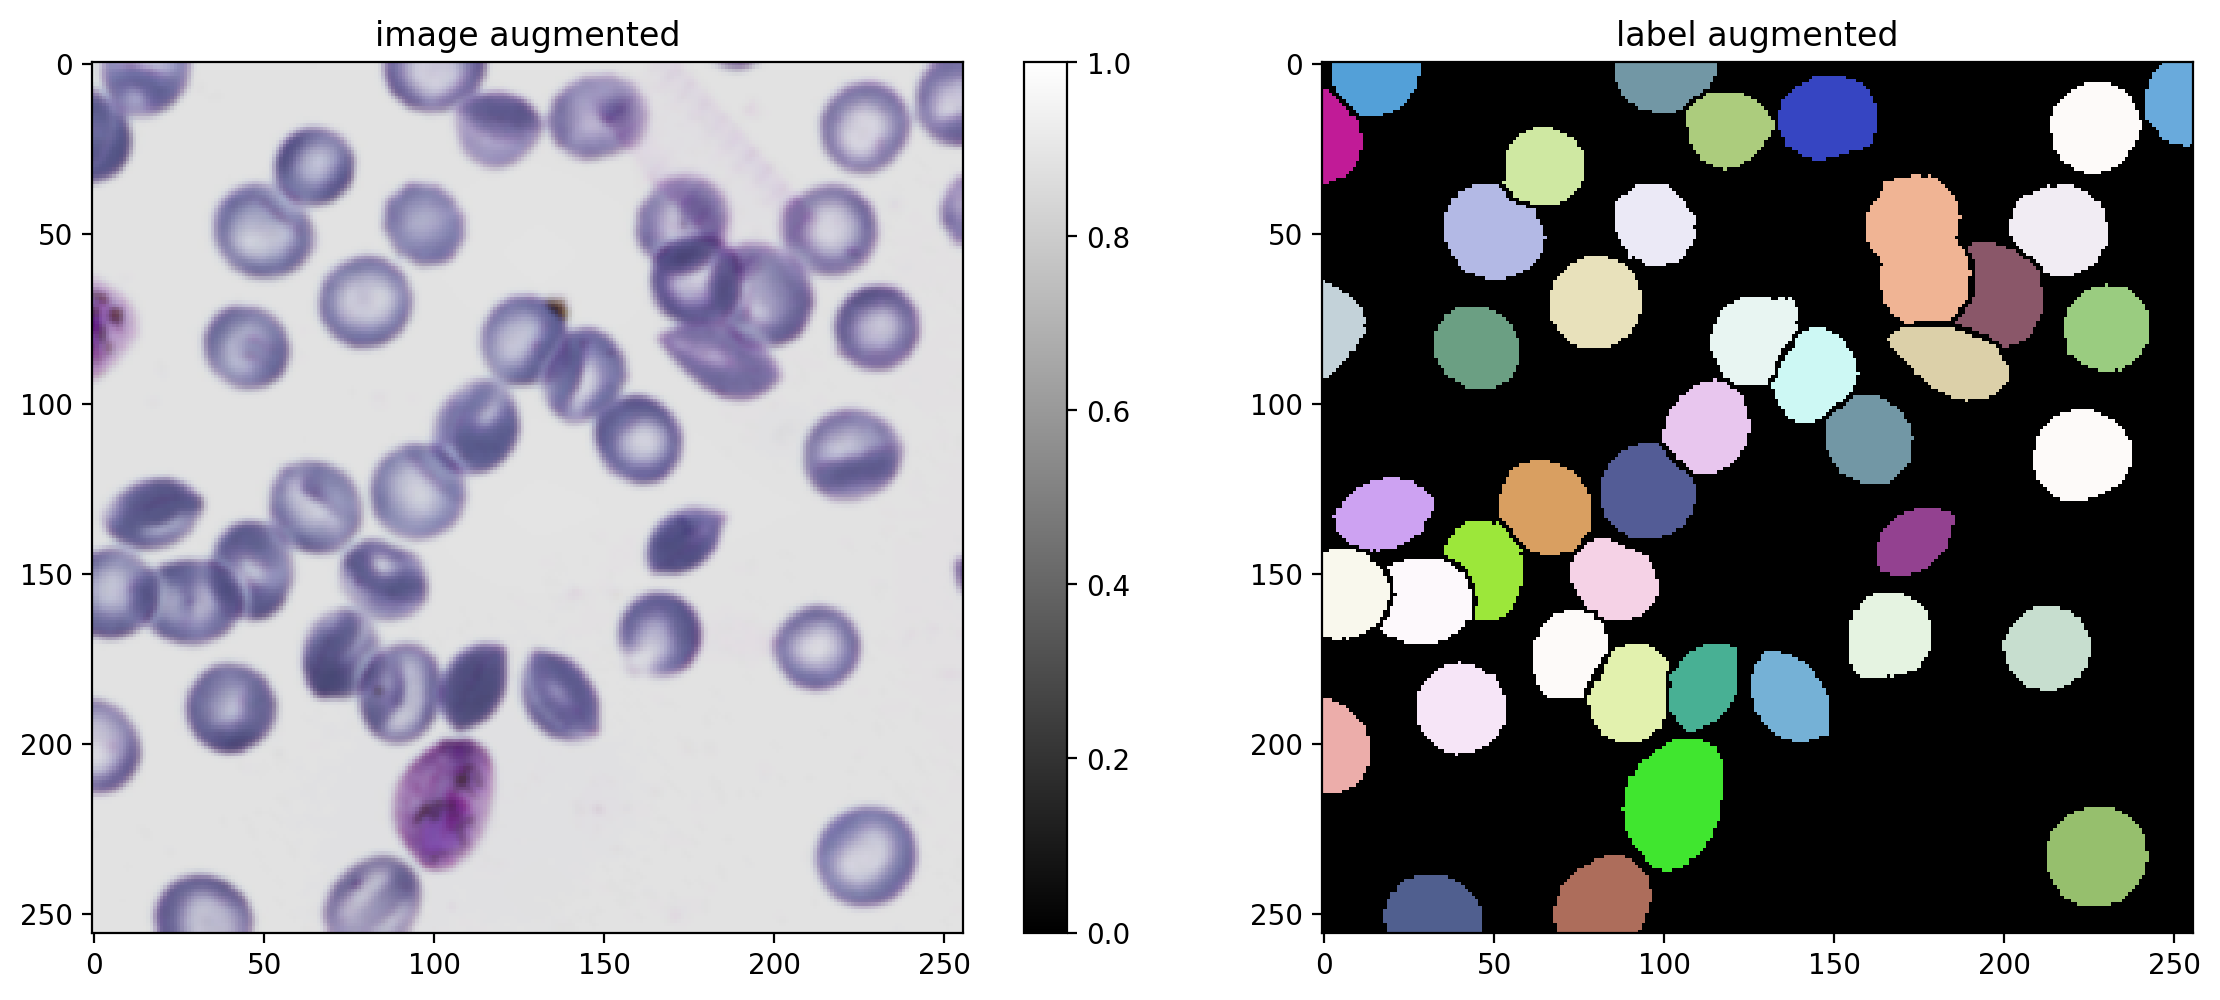

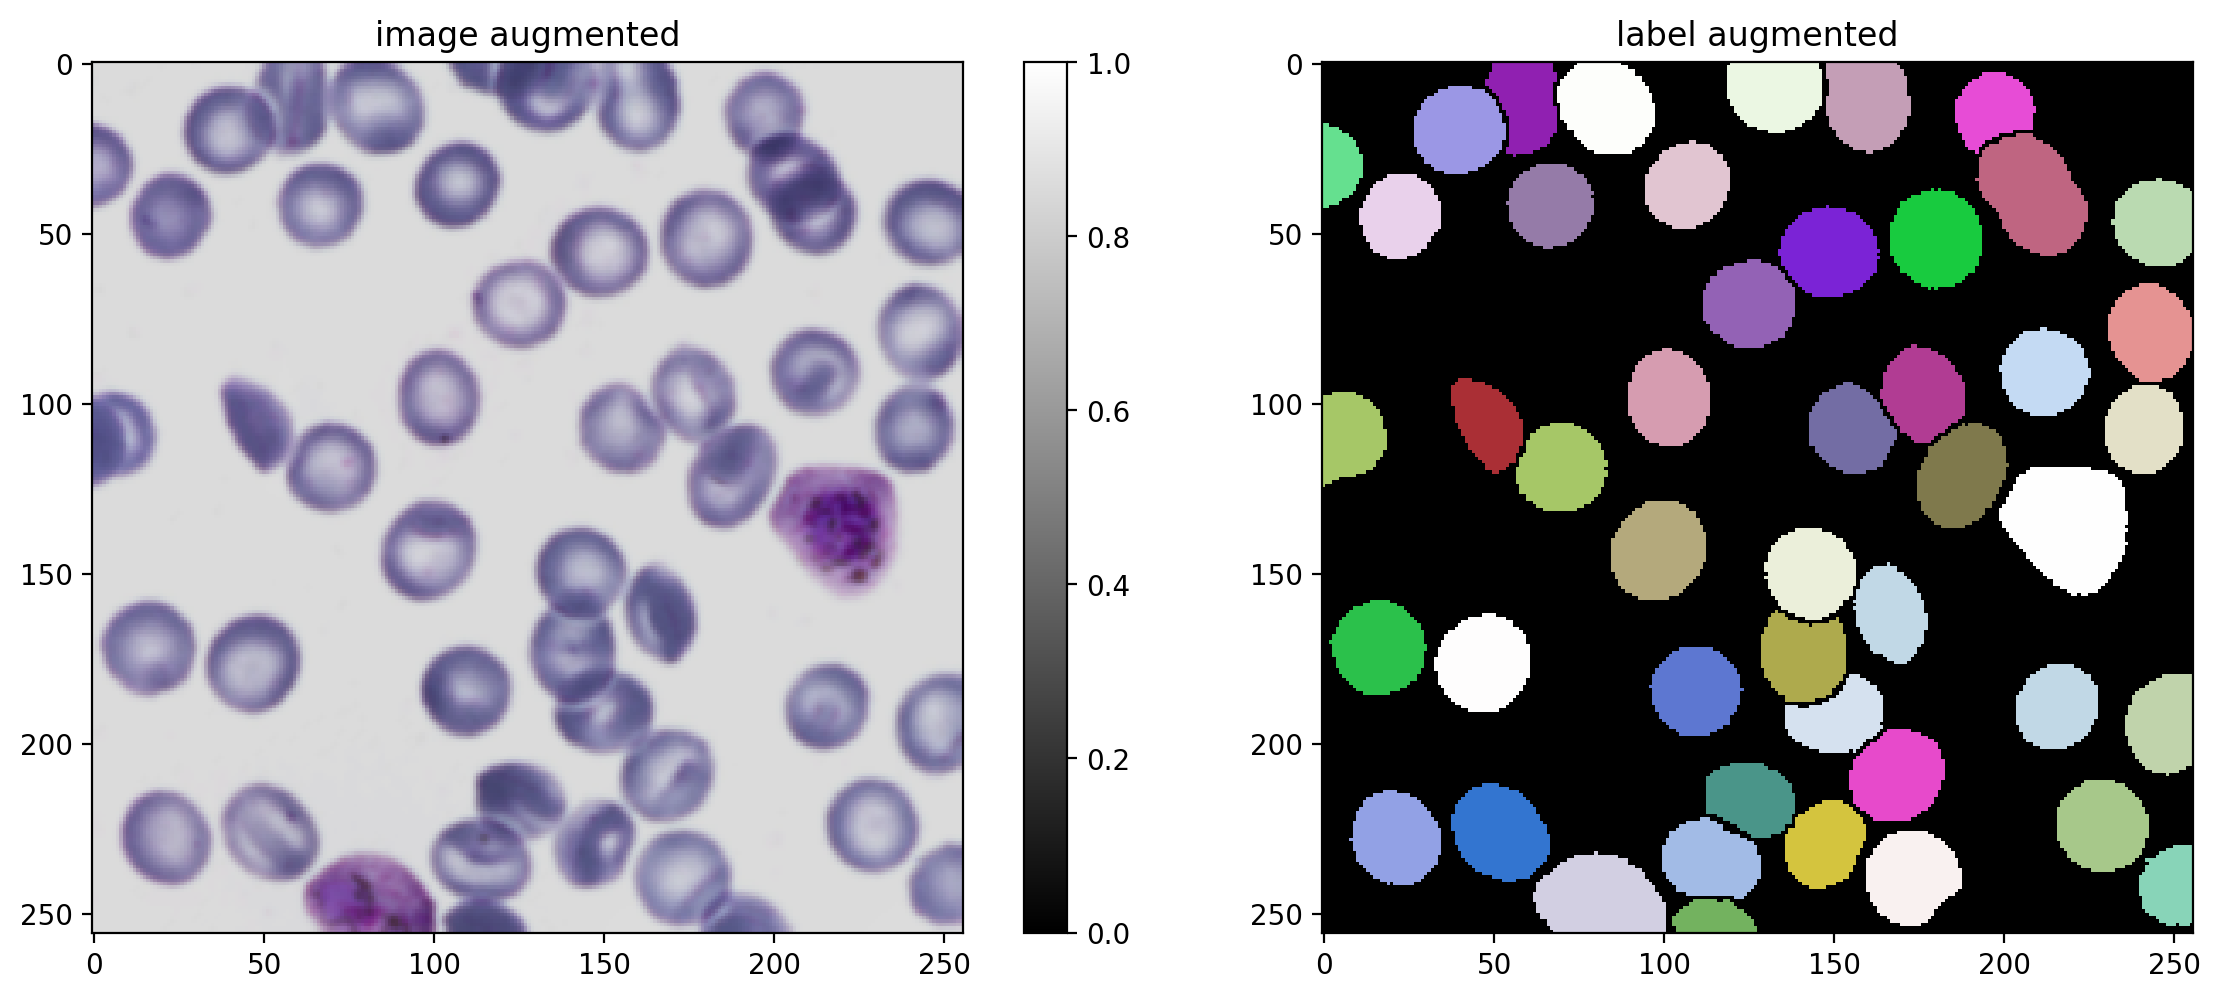

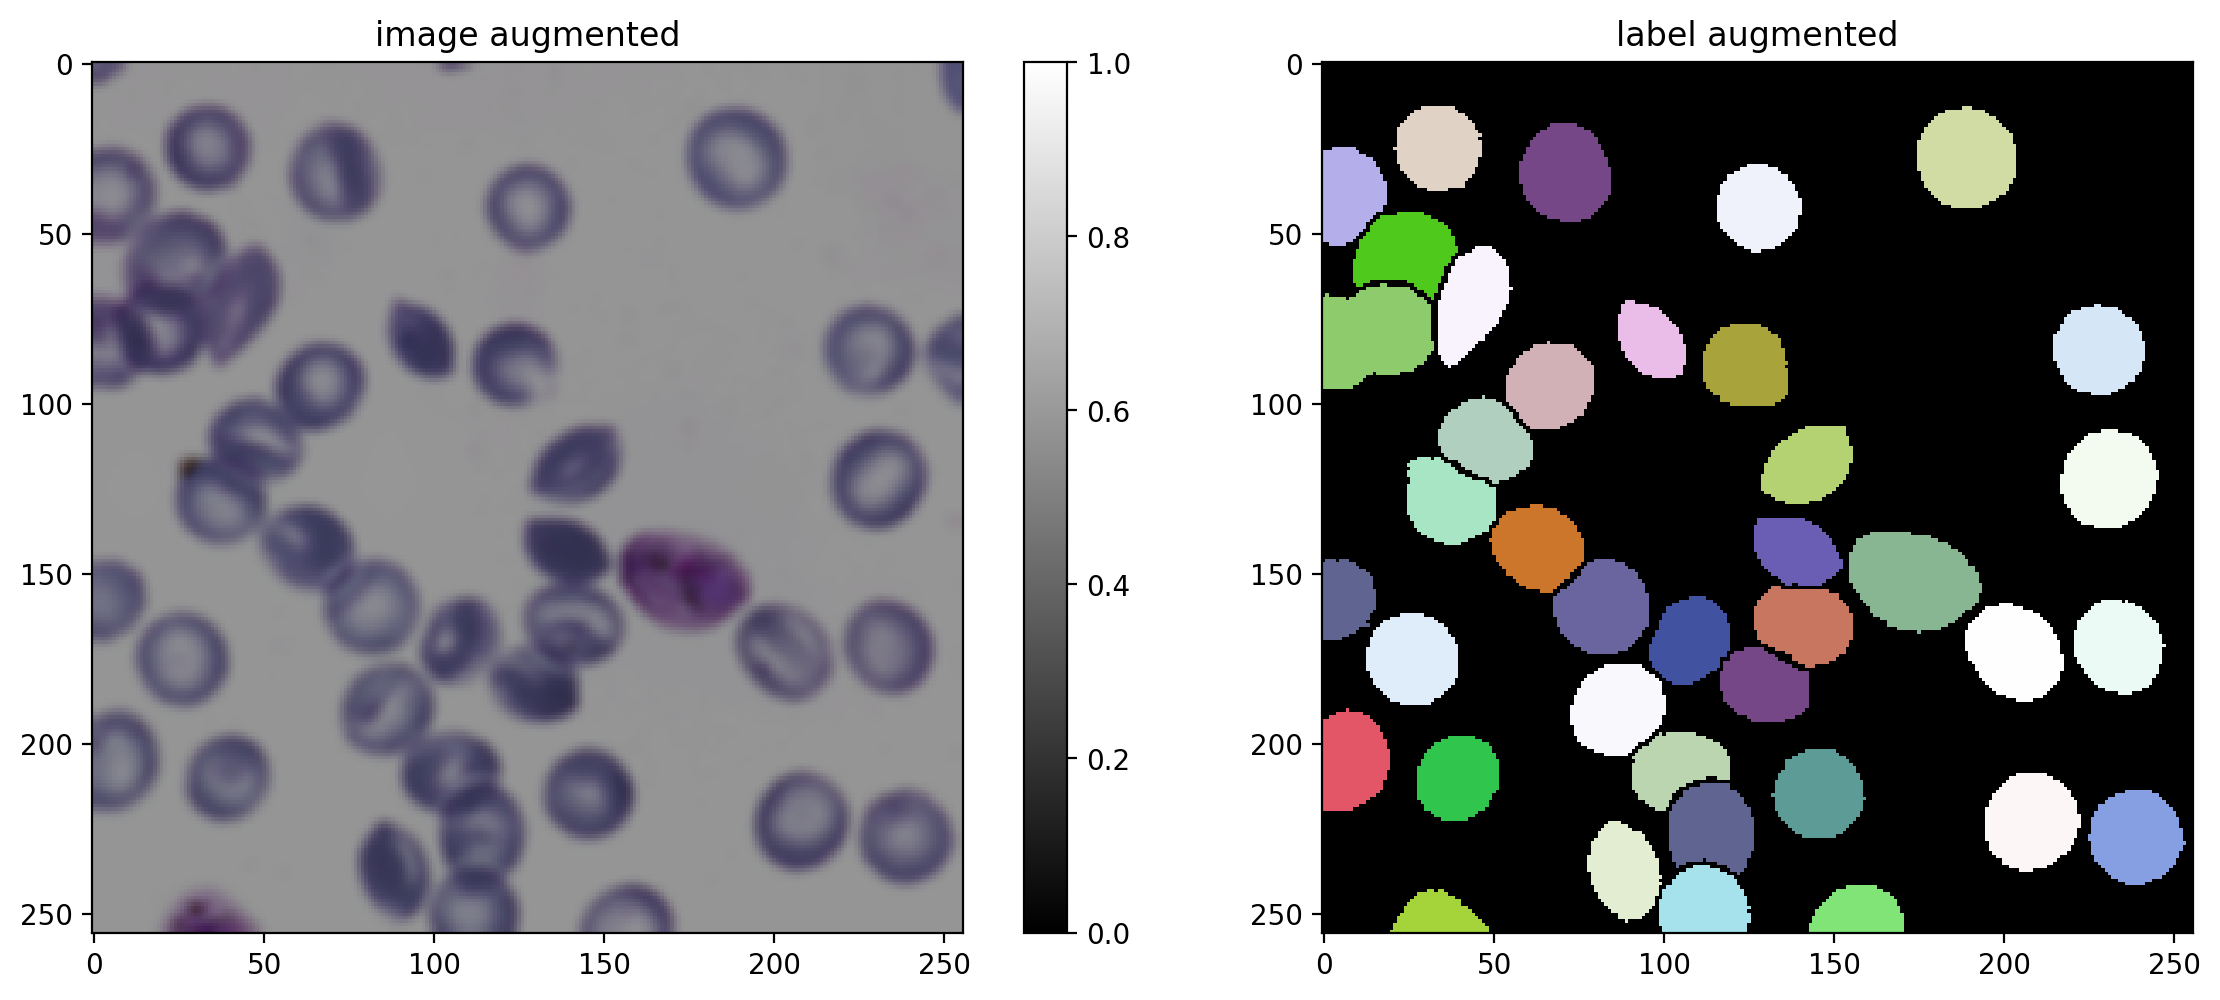

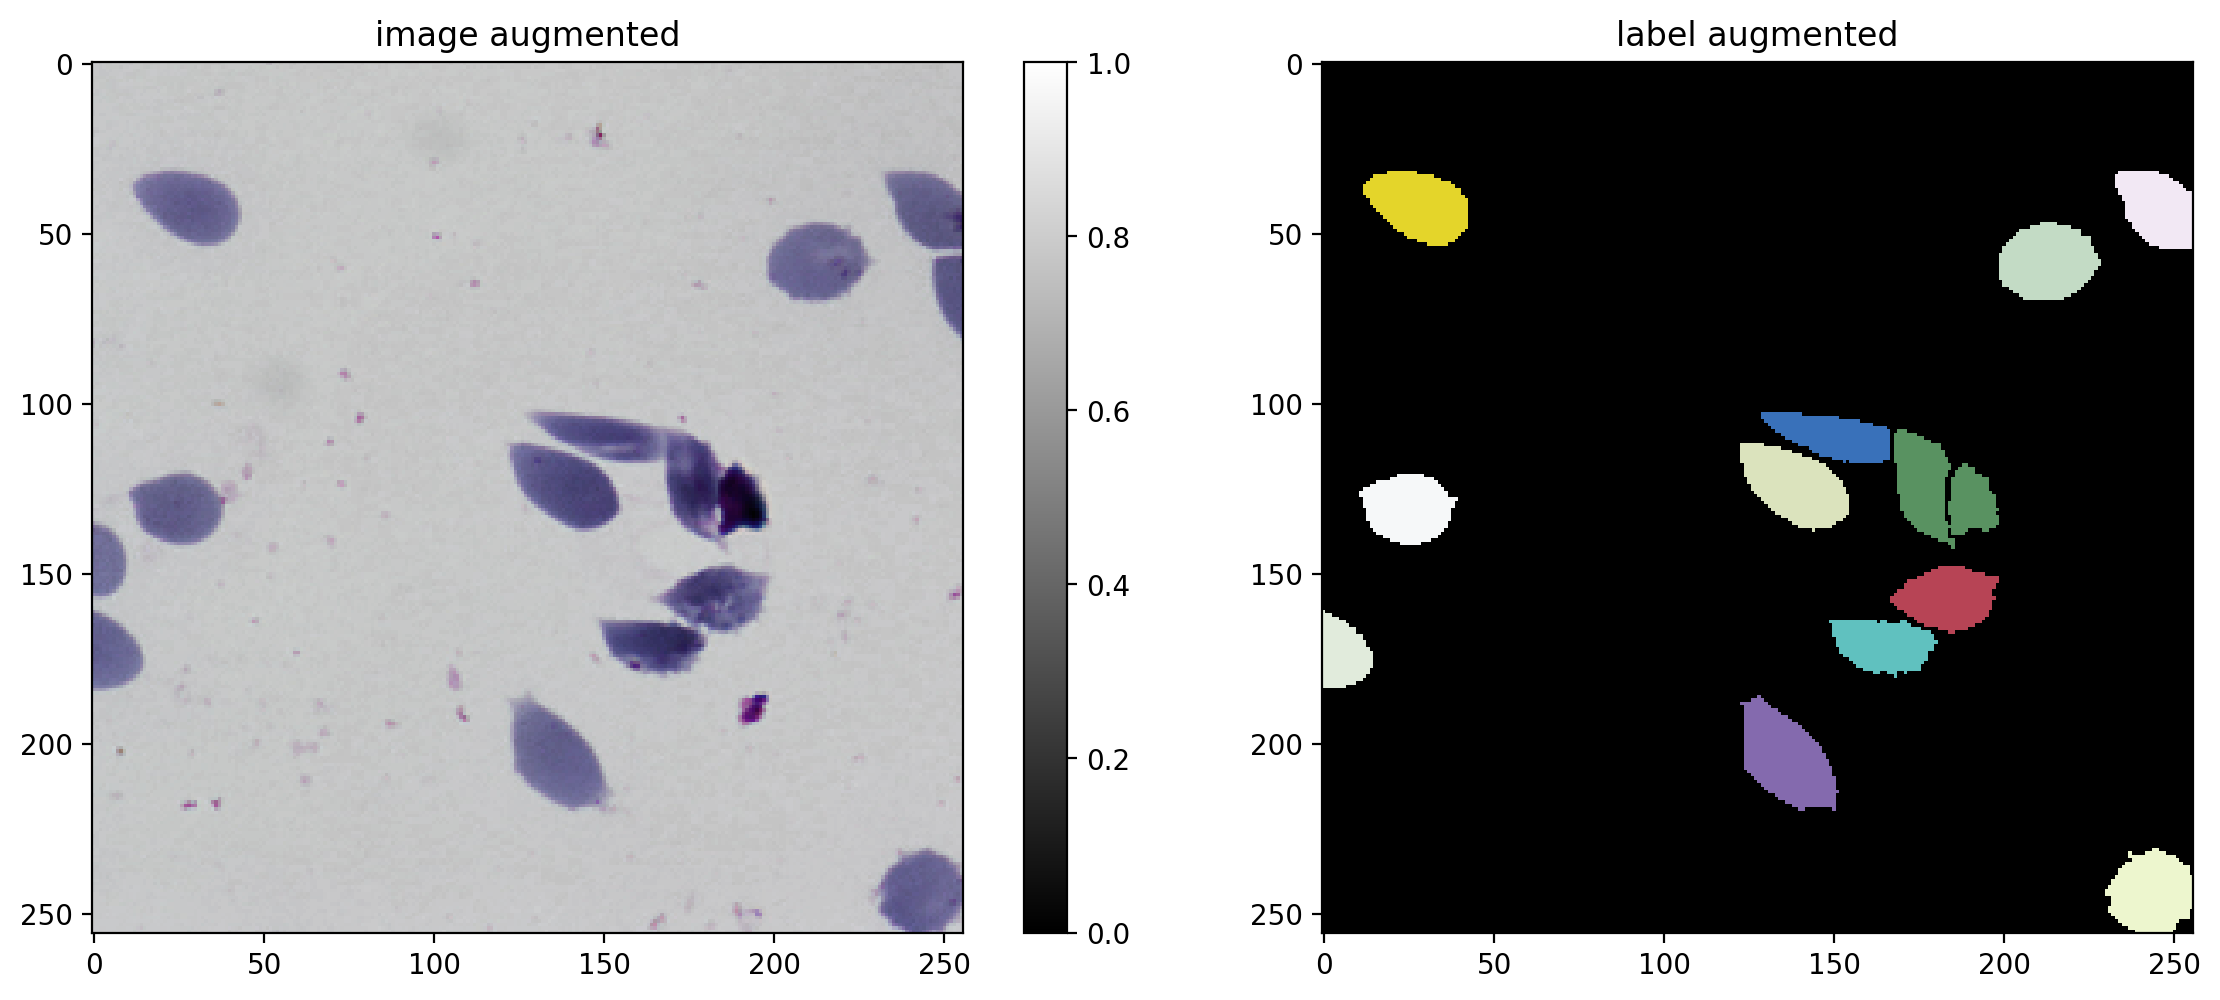

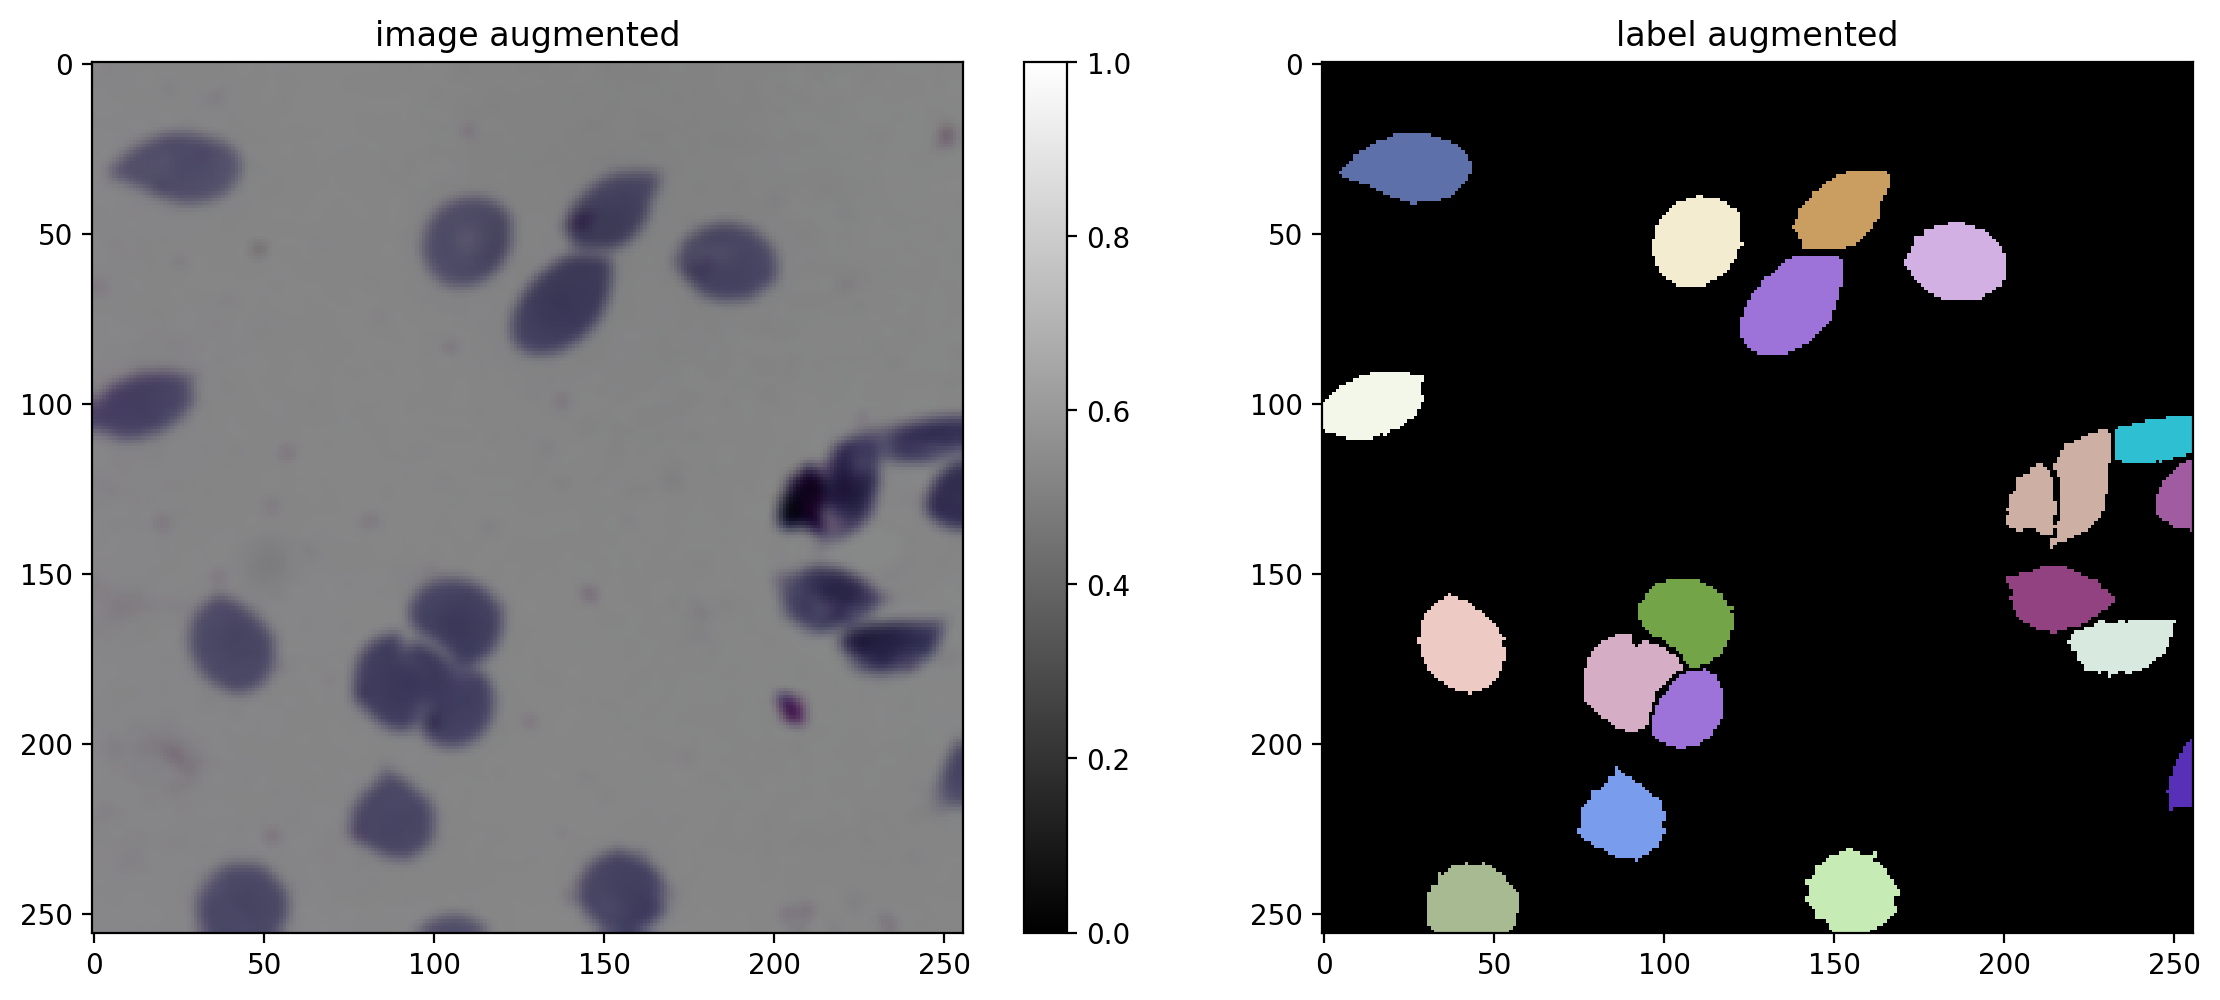

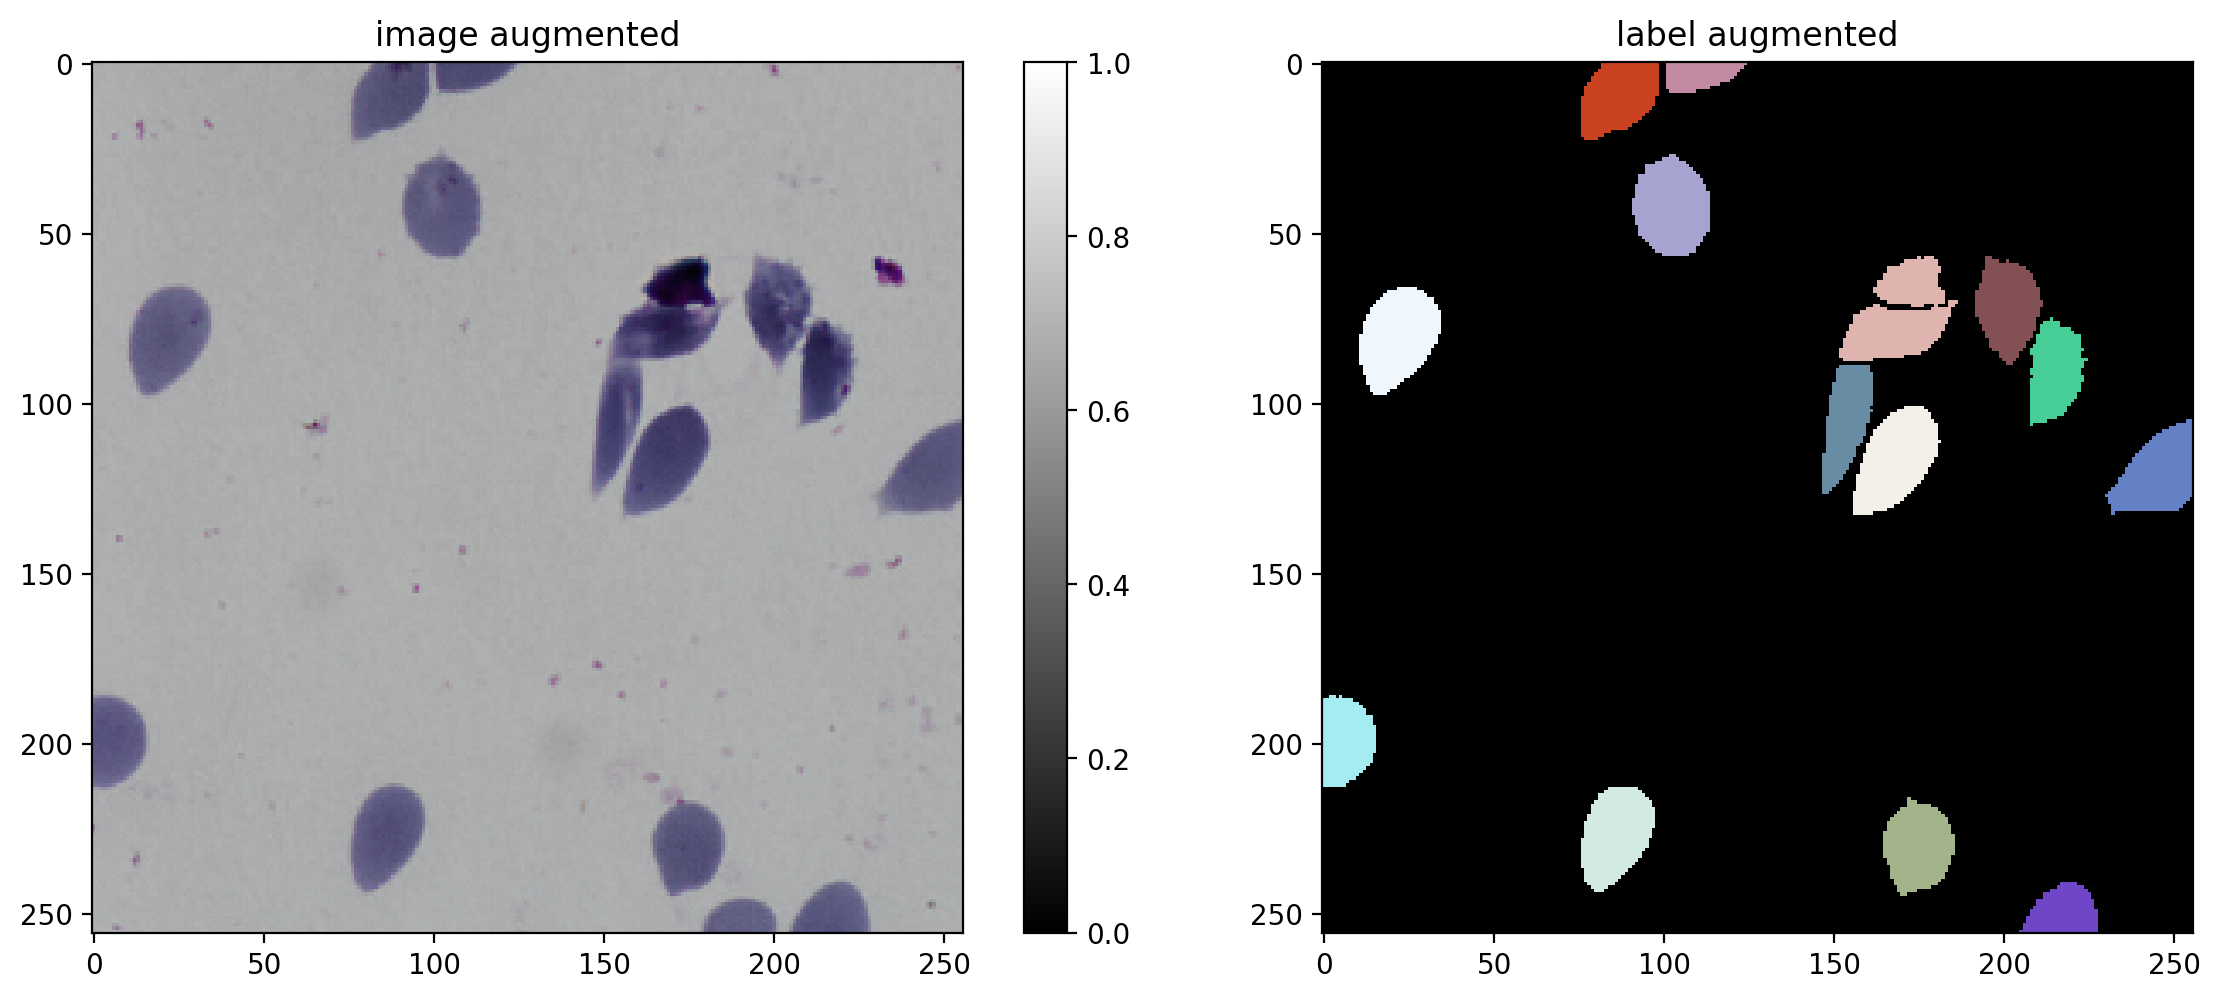

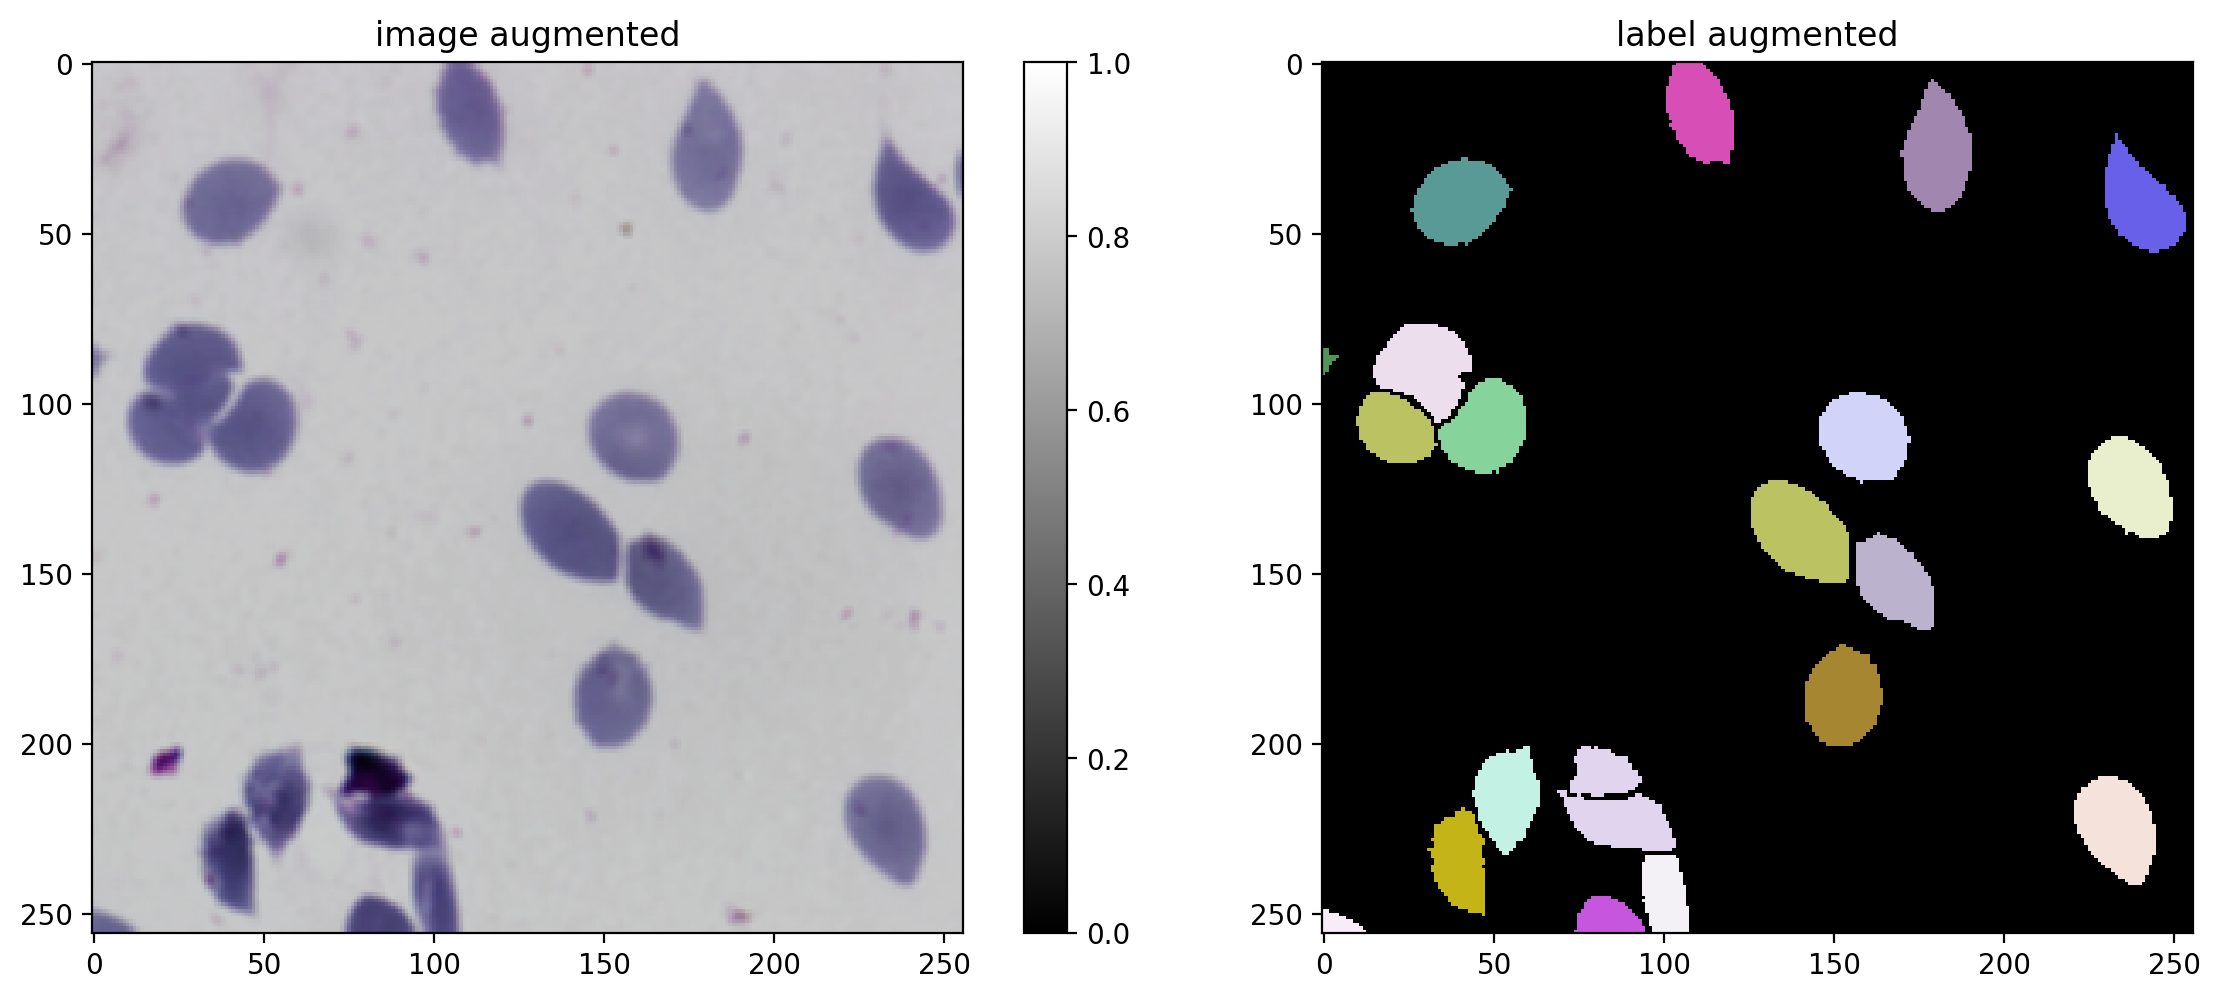

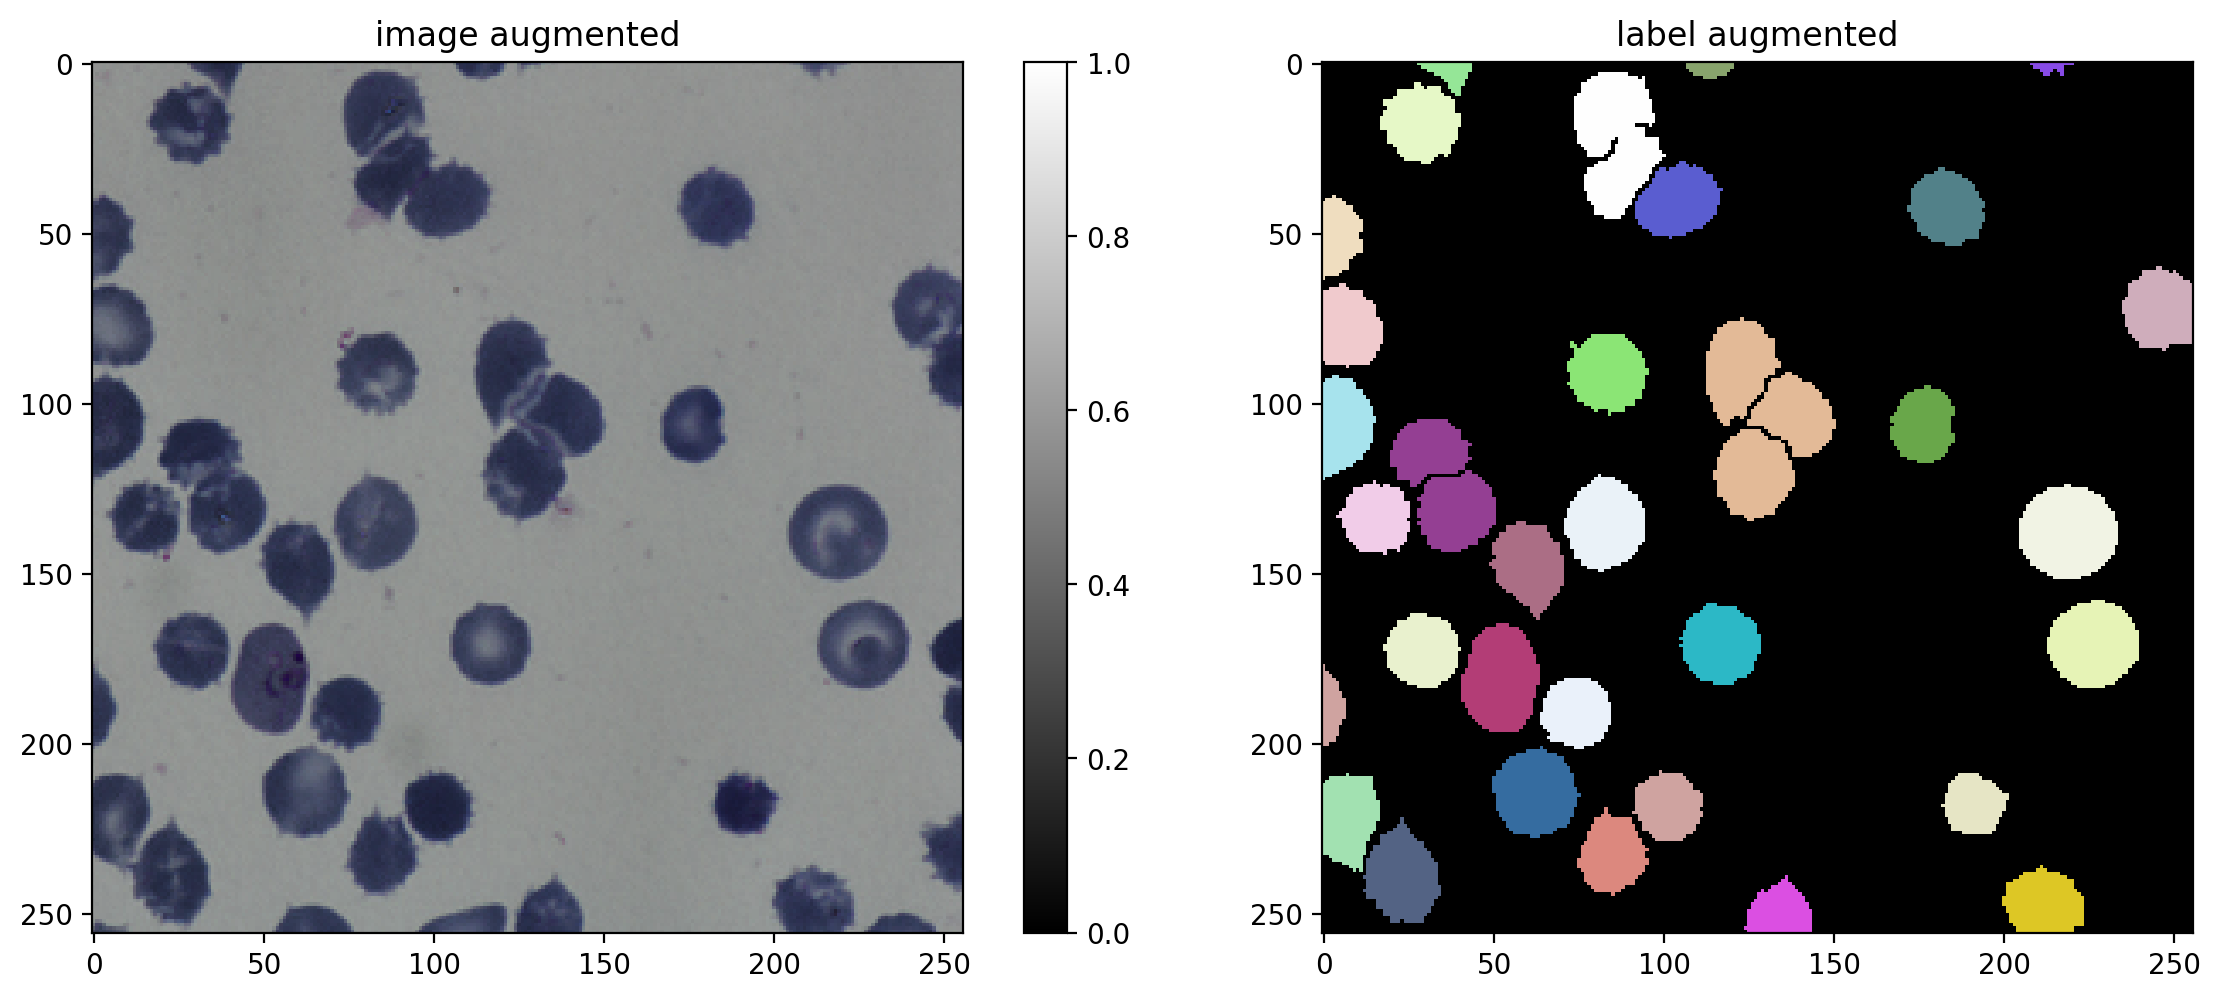

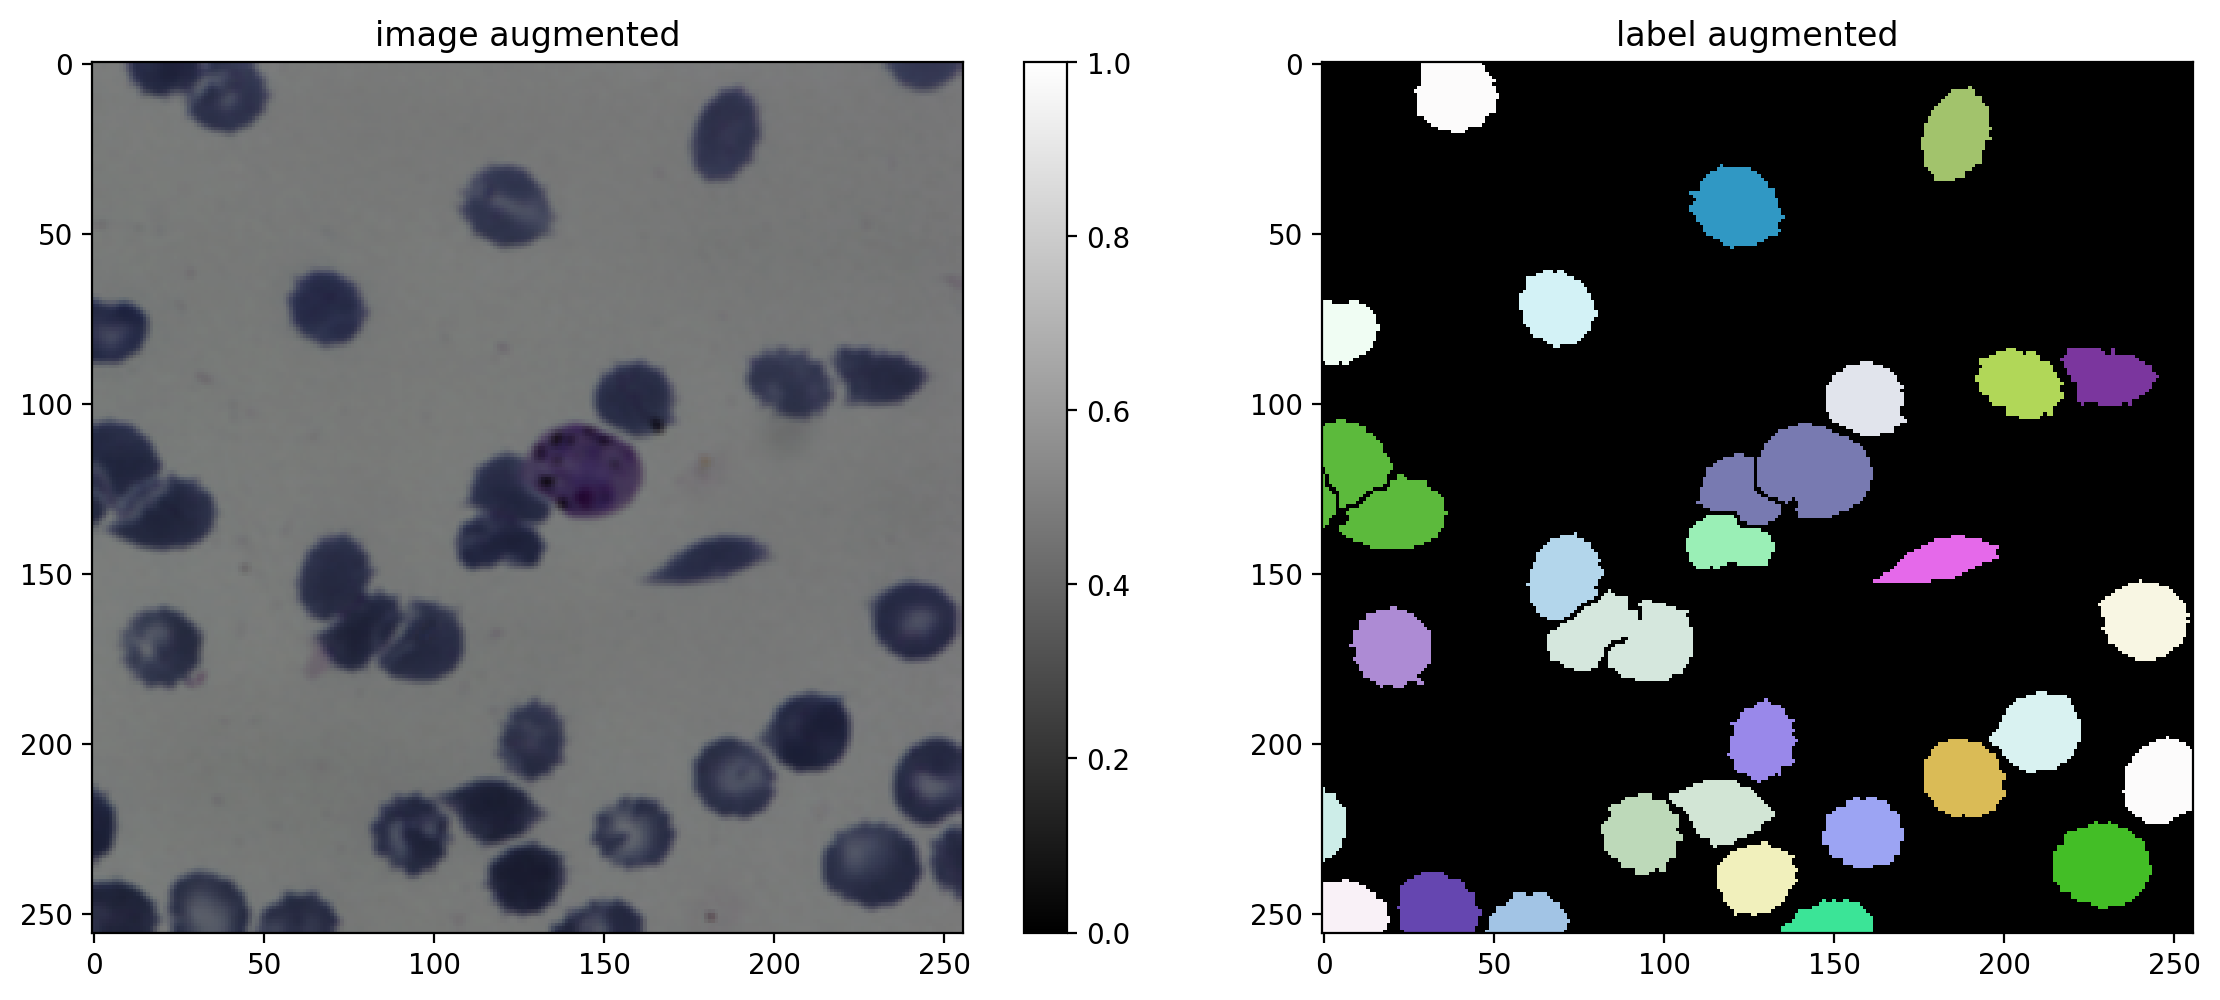

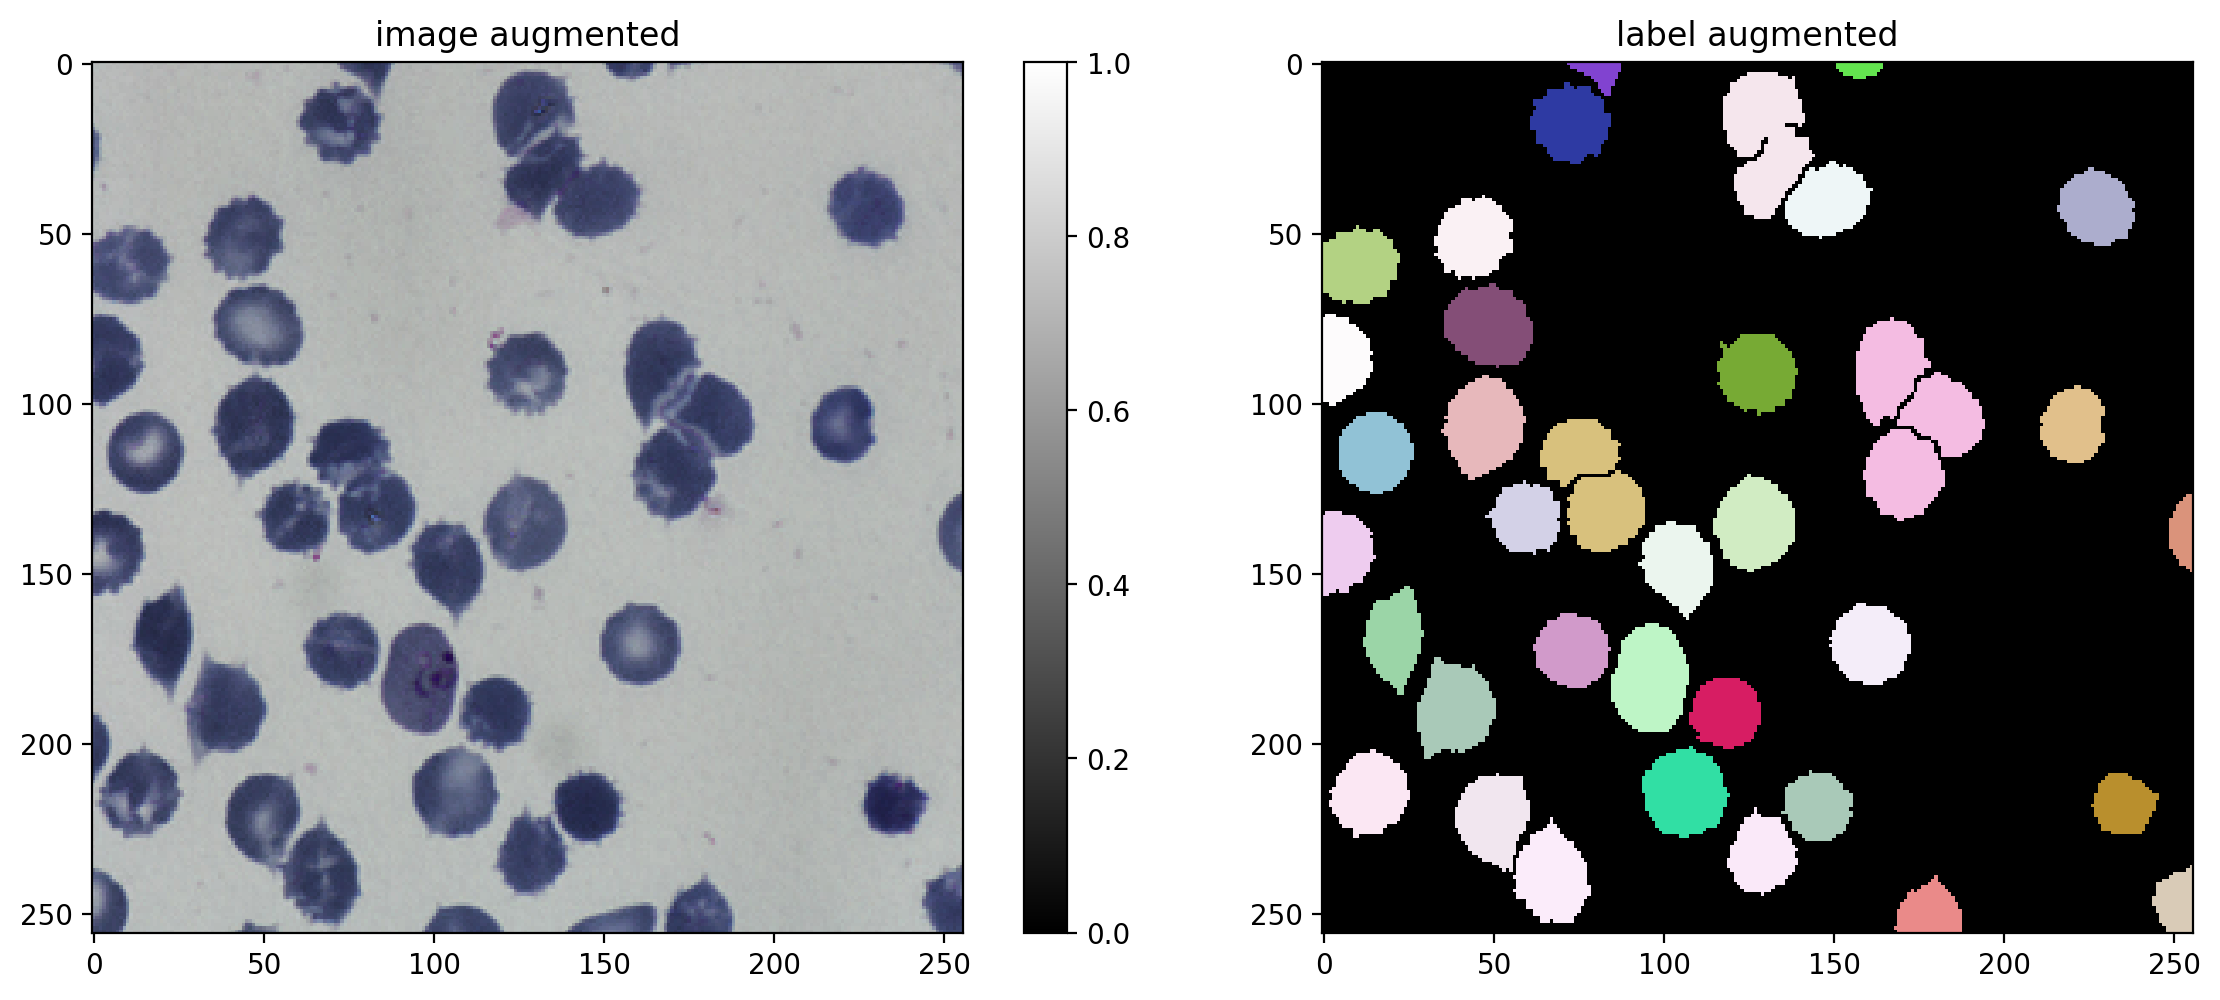

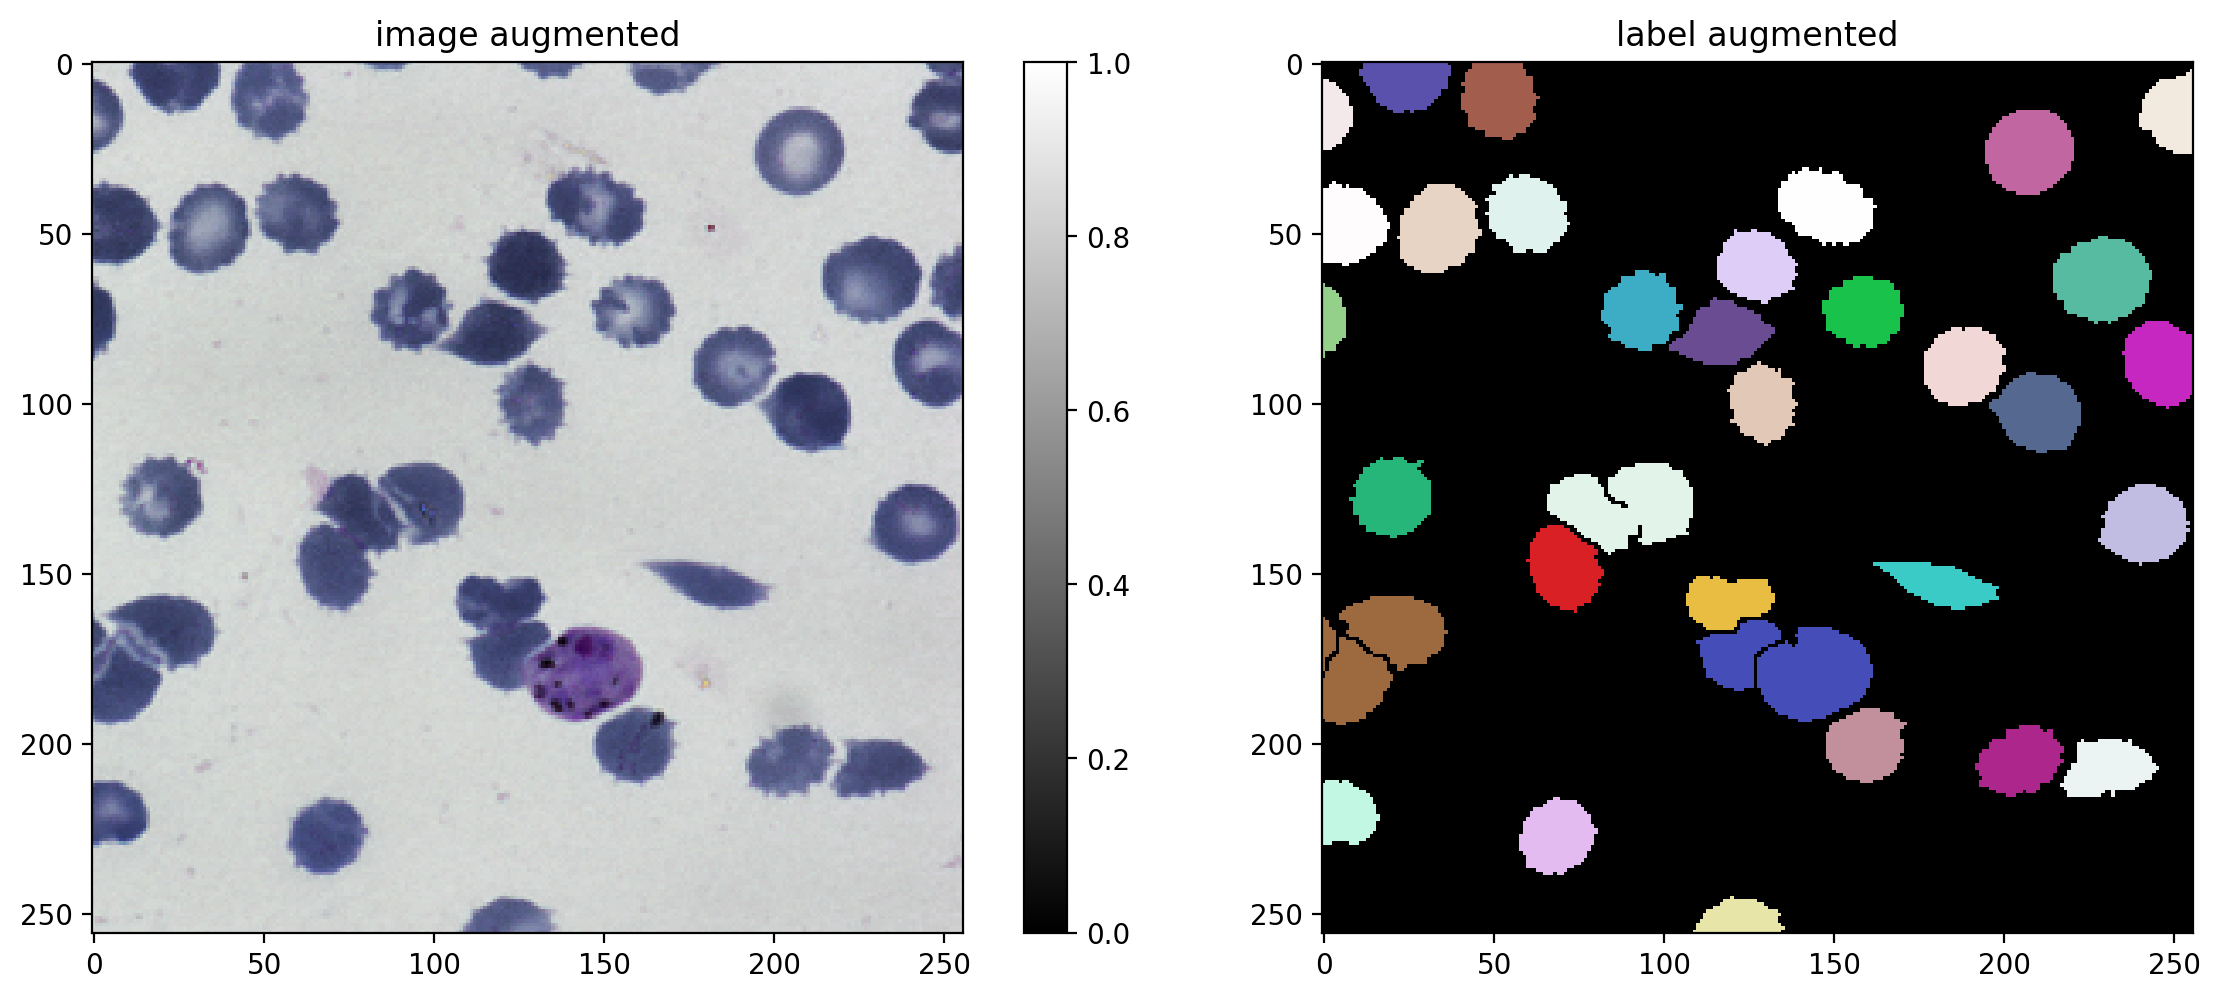

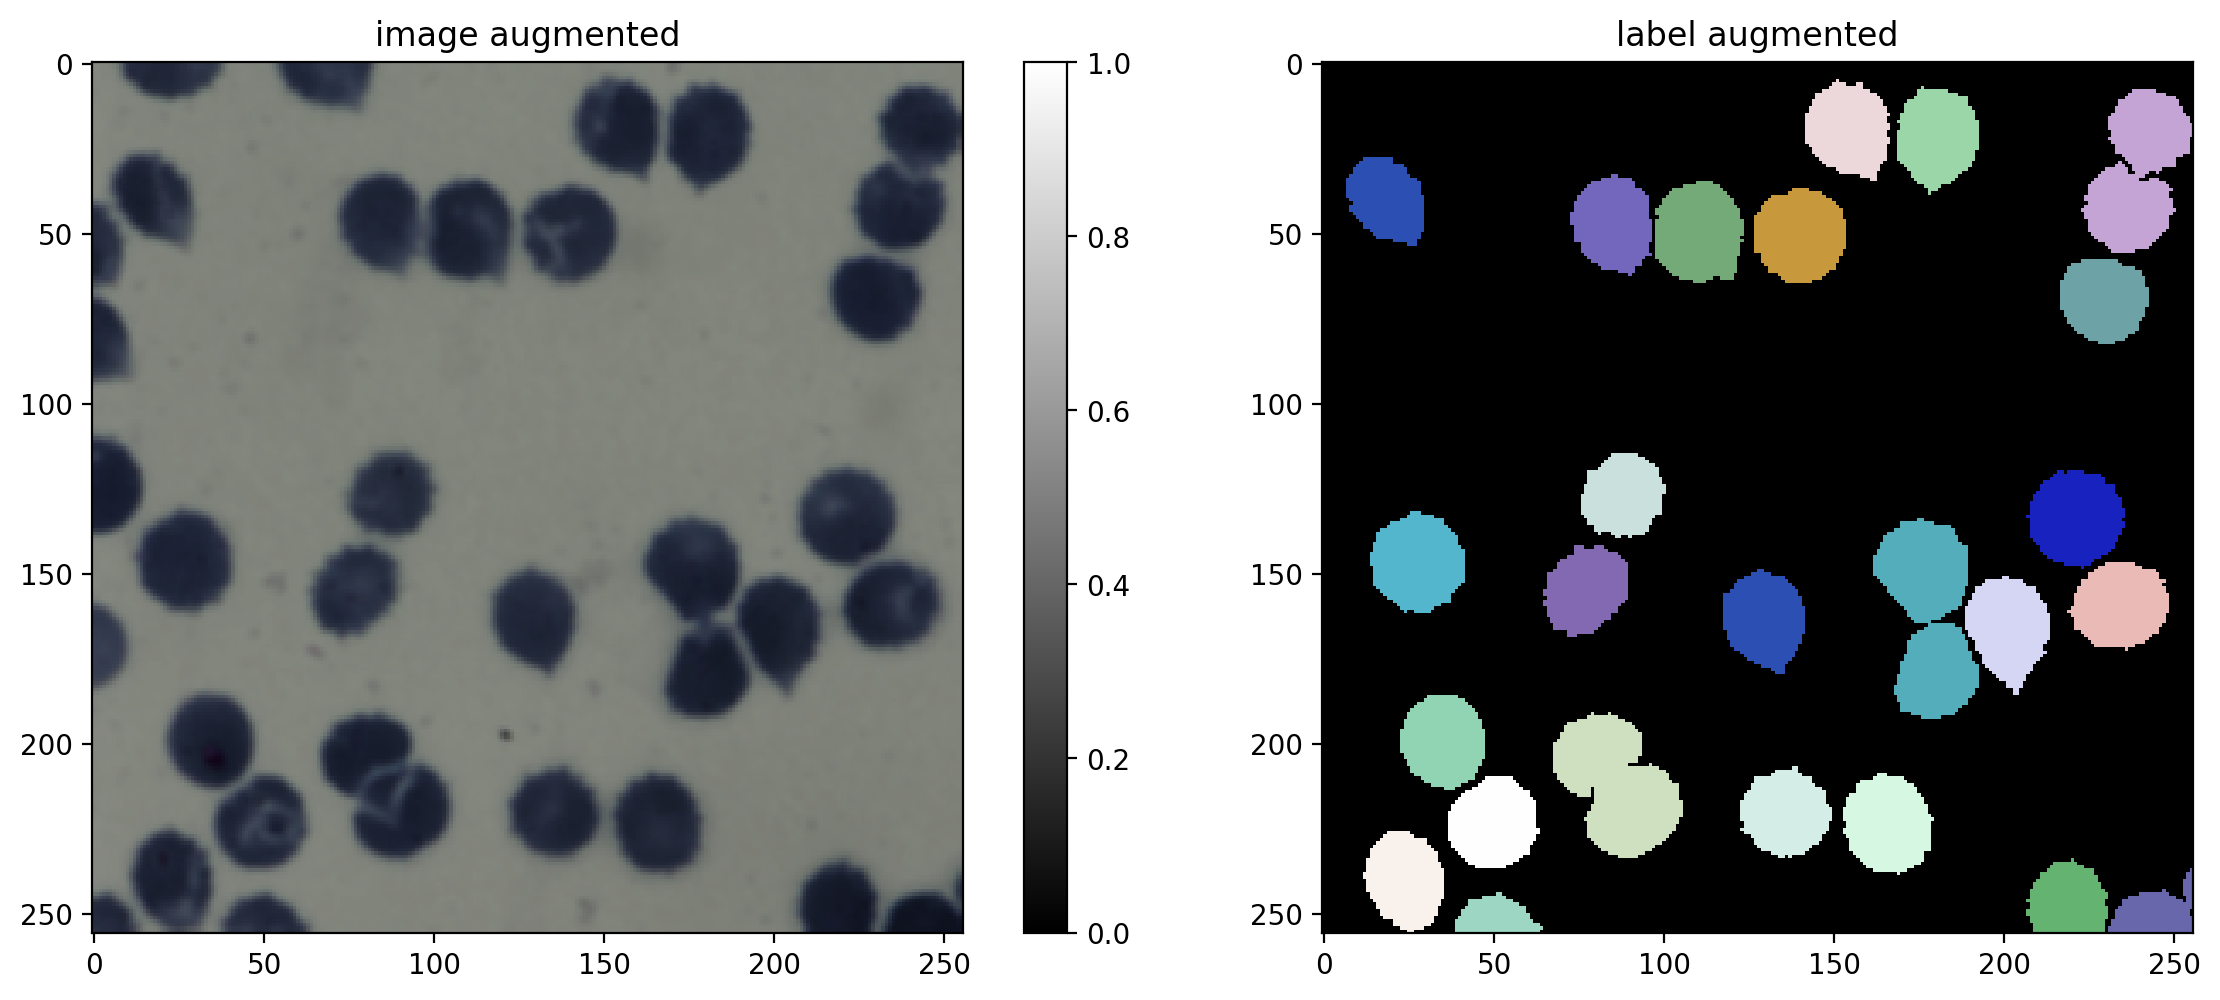

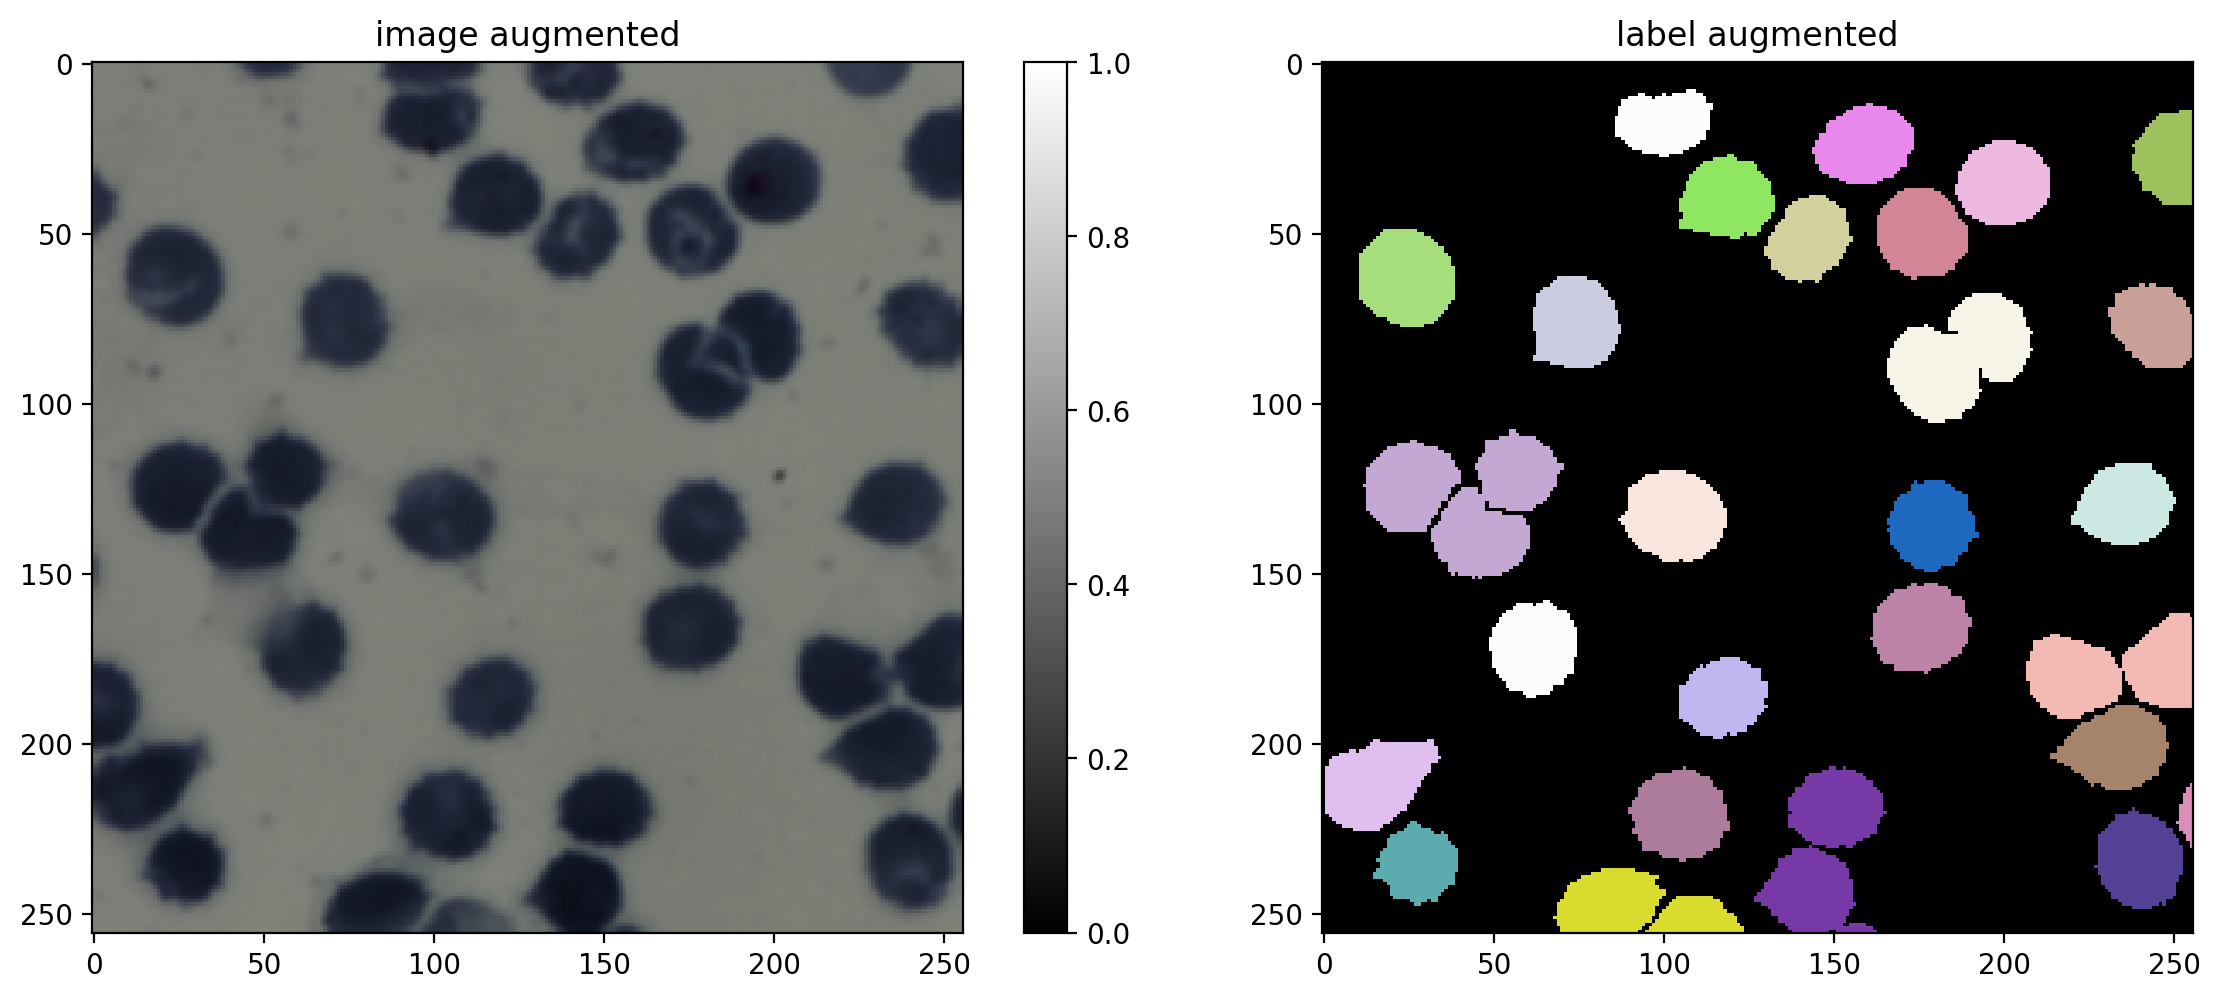

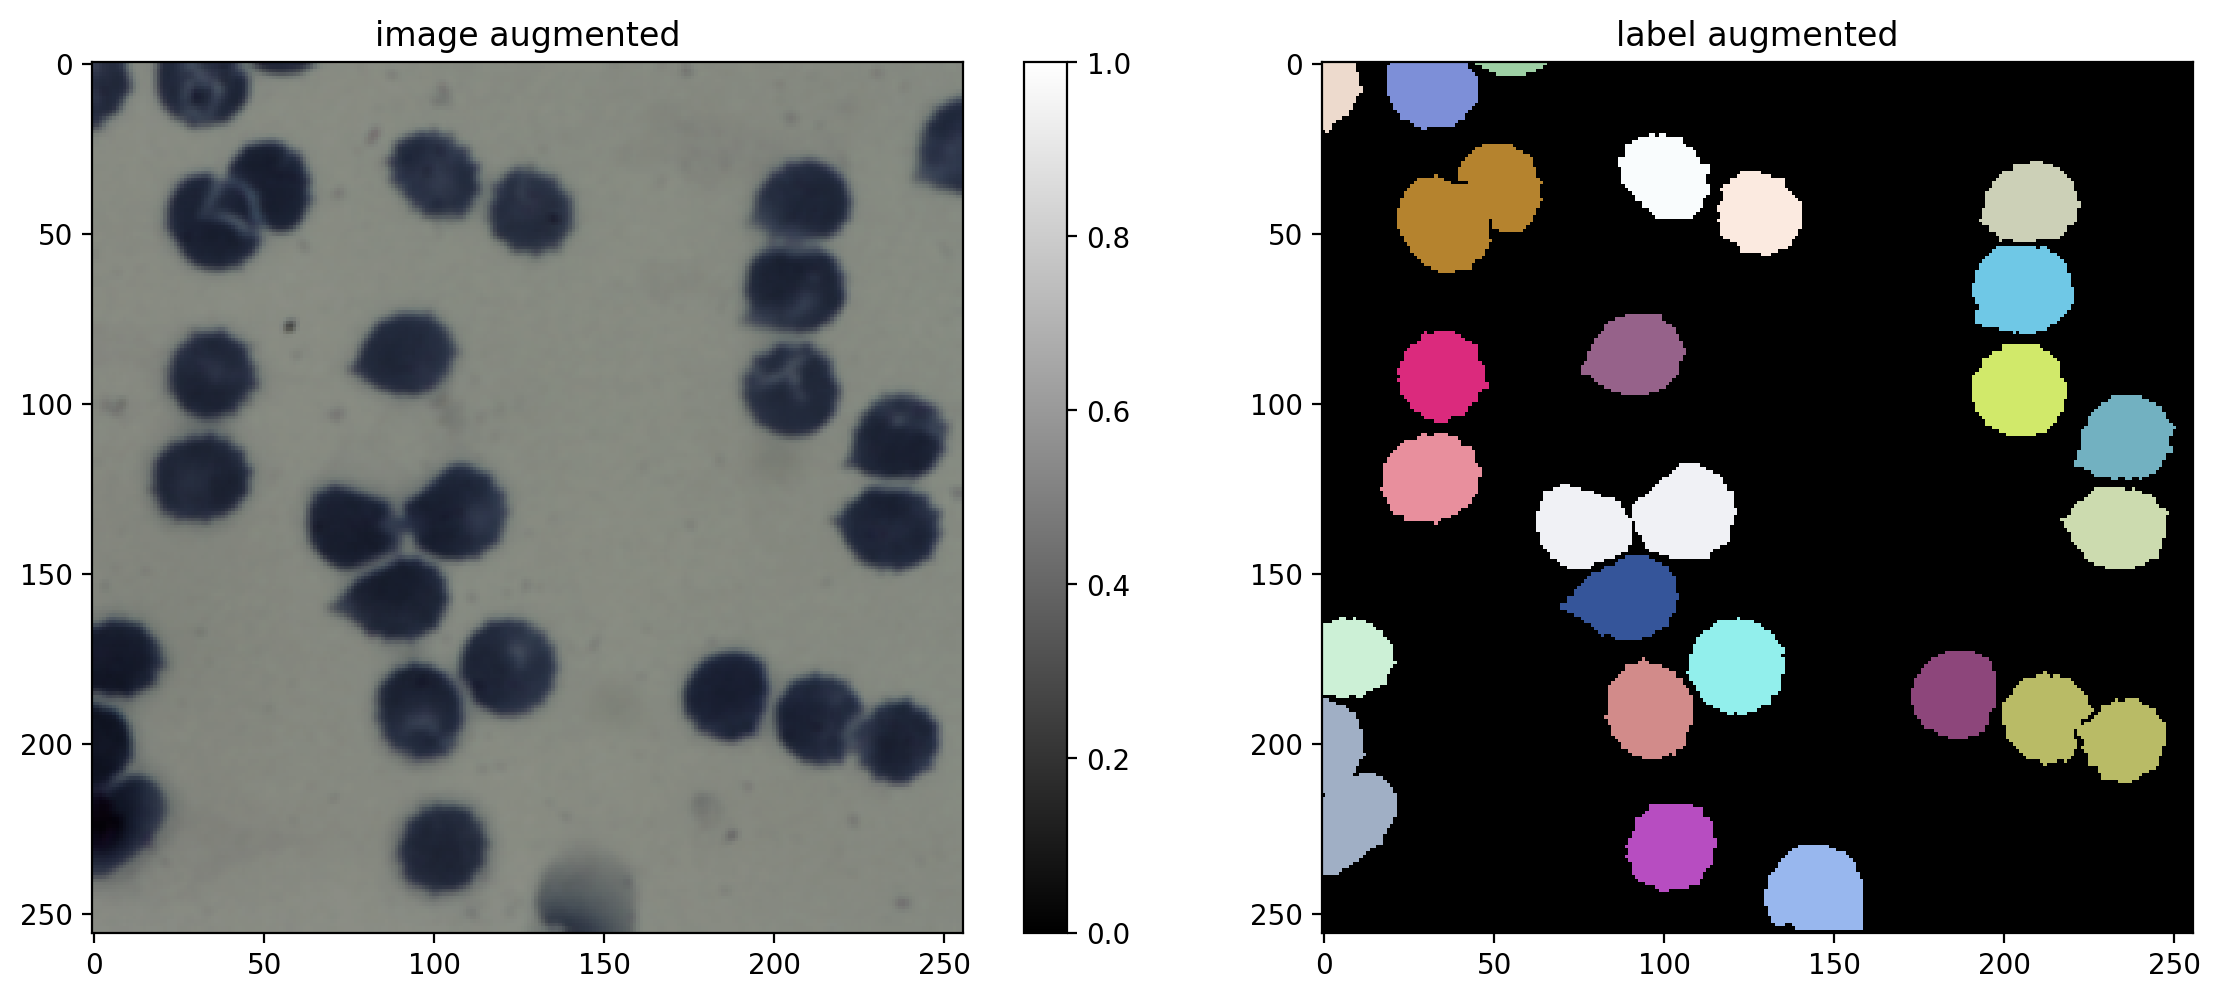

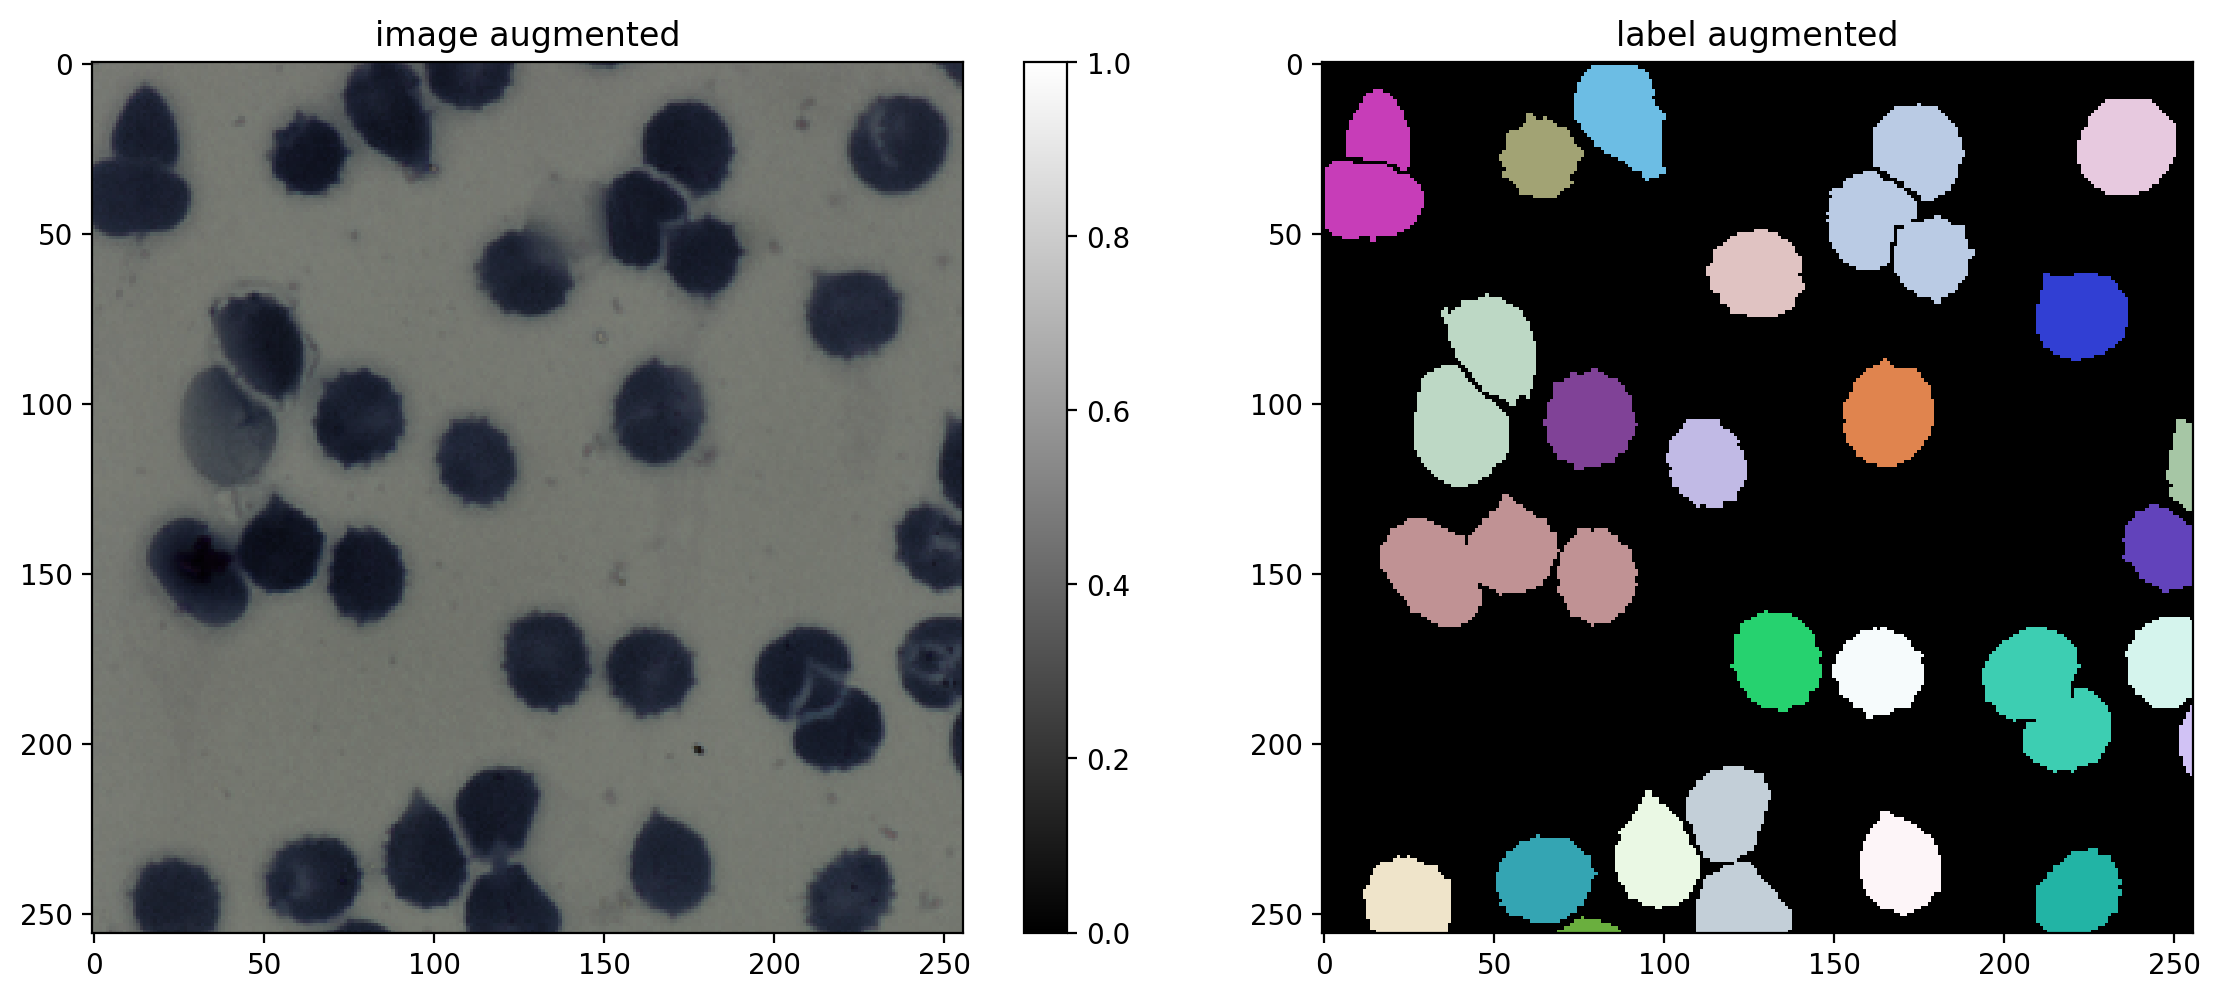

In [4]:
from DataVisualization.aug import augmenter

for i in range(20):
    img_aug, lbl_aug = augmenter(X[i],Y[i])
    plot_img_label(img_aug, lbl_aug, img_title="image augmented", lbl_title="label augmented")